In [24]:
import folium,json
import folium as fo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
from IPython.display import IFrame
import os
import json
%matplotlib inline

** Link to view this notebook in Jupyter Notebook Viewer (for the maps) **

http://nbviewer.jupyter.org/github/m-yaghini/ada17/blob/master/03%20-%20Interactive%20Viz/Homework%203.ipynb

# Part 1

## Task Description

> Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.
Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. Think about the colors you use, how you decided to split the intervals into data classes or which interactions you could add in order to make the visualization intuitive and expressive. 
Compare Switzerland's unemployment rate to that of the rest of Europe.

In [6]:
EUROSTAT_UNEMPLOYMENT_TIPSUN20_DATASET = 'Eurostat_tipsun20.xls'
SWISS_UNEPMLOYMENT_DATASET = 'TauxdechomageSuisse.csv'
EUROPE_JSON = r'europe.geojson' # from https://github.com/leakyMirror/map-of-europe/blob/master/GeoJSON/europe.geojson



 The unemployment rate is the number of unemployed persons expressed as a percentage of the labour force, based on the International Labour Office (ILO) definition.
 
 Info about choosen dataset:
 Unemployment rate - annual data
 We used the following dataset : http://ec.europa.eu/eurostat/web/products-datasets/-/tipsun20
 
 Hyperlink to the table: http://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&plugin=1&language=en&pcode=tipsun20

 Code: tipsun20
 
 Last update:31.10.2017


In [10]:
unemploymentRates_full = pd.read_excel(open(EUROSTAT_UNEMPLOYMENT_TIPSUN20_DATASET,'rb'), sheetname='Sheet0') #,index_col='Country'
unemploymentRates_full

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Belgium,9.7,9.5,9.2,9.3,8.4,6.9,6.6,7.5,8.2,...,7.5,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8
1,Bulgaria,:,:,:,:,:,16.4,19.6,18.2,13.7,...,6.9,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6
2,Czech Republic,4,3.9,4.8,6.5,8.7,8.8,8.1,7.3,7.8,...,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0
3,Denmark,6.7,6.3,5.2,4.9,5.2,4.3,4.5,4.6,5.4,...,3.8,3.4,6.0,7.5,7.6,7.5,7.0,6.6,6.2,6.2
4,Germany,8.2,8.9,9.6,9.4,8.6,7.9,7.8,8.6,9.7,...,8.5,7.4,7.6,7.0,5.8,5.4,5.2,5.0,4.6,4.1
5,Estonia,:,:,:,:,:,14.6,13.0,11.2,10.3,...,4.6,5.5,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8
6,Ireland,12.3,11.7,9.9,7.5,5.6,4.3,3.9,4.5,4.6,...,4.7,6.4,12.0,13.9,14.7,14.7,13.1,11.3,9.4,7.9
7,Greece,:,:,:,11.1,12,11.2,10.7,10.3,9.7,...,8.4,7.8,9.6,12.7,17.9,24.5,27.5,26.5,24.9,23.6
8,Spain,20.7,19.9,18.4,16.4,13.6,11.9,10.6,11.5,11.5,...,8.2,11.3,17.9,19.9,21.4,24.8,26.1,24.5,22.1,19.6
9,France,10.2,10.5,10.7,10.3,10,8.6,7.8,7.9,8.5,...,8.0,7.4,9.1,9.3,9.2,9.8,10.3,10.3,10.4,10.1


We decide to remove all columnns containing missing values. It turns out it only concerns the earlier years (from 1995 to 1999). We consider that, for the granted task, it's ok to omit those columns and there is enough data and most importantly they are continous in time. So we don't alter any eventual pattern.
Also imputing those missing values would be delicate as the situation for each country can vary widely in a year.

In [11]:
unemploymentRates= unemploymentRates_full[[column for column in unemploymentRates_full.columns if '199' not in column]]
unemploymentRates['average'] = unemploymentRates.mean(axis=1)


/Users/mohammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Comparaison with swiss part

For the swiss unemployement rates, we take the data from armstat, as in part 2. But here we are not interested in Cantons. We then add the information over the selected number of years (to match the european dataset) and we add a row to the european dataset.
We then sort the dataset  increasing average unemployment rate over the period from 2000 to 2016.
Of course Switzerland is the best ! 

In [12]:

df = pd.read_csv(SWISS_UNEPMLOYMENT_DATASET, encoding='utf-16').T
df[0] =  df[0].apply(lambda x: re.sub("[^0-9]", "", x))
df = df.apply(pd.to_numeric, errors='ignore')

swiss  = df.groupby(0).mean()
swissUnemploymentRates = [item for sublist in swiss.values[7:24] for item in sublist]
swissUnemploymentRates.extend([np.mean(swissUnemploymentRates)])
swissrow= ['Switzerland'] + swissUnemploymentRates 
unemploymentRates.loc[-1] = swissrow
unemploymentRates= unemploymentRates.sort_values(['average'], ascending=True)
unemploymentRates



/Users/mohammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
-1,Switzerland,1.833333,1.7,2.55,3.691667,3.883333,3.758333,3.333333,2.775,2.558333,3.716667,3.508333,2.85,2.908333,3.15,3.041667,3.166667,3.316667,3.043627
15,Luxembourg,2.200000,1.9,2.60,3.800000,5.000000,4.600000,4.600000,4.200,4.900000,5.100000,4.600000,4.80,5.100000,5.90,6.000000,6.500000,6.300000,4.594118
19,Austria,3.900000,4.0,4.40,4.800000,5.500000,5.600000,5.300000,4.900,4.100000,5.300000,4.800000,4.60,4.900000,5.40,5.600000,5.700000,6.000000,4.988235
18,Netherlands,3.700000,3.1,3.70,4.800000,5.700000,5.900000,5.000000,4.200,3.700000,4.400000,5.000000,5.00,5.800000,7.30,7.400000,6.900000,6.000000,5.152941
3,Denmark,4.300000,4.5,4.60,5.400000,5.500000,4.800000,3.900000,3.800,3.400000,6.000000,7.500000,7.60,7.500000,7.00,6.600000,6.200000,6.200000,5.576471
27,United Kingdom,5.400000,5.0,5.10,5.000000,4.700000,4.800000,5.400000,5.300,5.600000,7.600000,7.800000,8.10,7.900000,7.50,6.100000,5.300000,4.800000,5.964706
17,Malta,6.700000,7.6,7.00,7.600000,7.200000,6.900000,6.800000,6.500,6.000000,6.900000,6.900000,6.40,6.300000,6.40,5.800000,5.400000,4.700000,6.535294
2,Czech Republic,8.800000,8.1,7.30,7.800000,8.300000,7.900000,7.100000,5.300,4.400000,6.700000,7.300000,6.70,7.000000,7.00,6.100000,5.100000,4.000000,6.758824
22,Romania,7.600000,7.4,8.30,7.700000,8.000000,7.100000,7.200000,6.400,5.600000,6.500000,7.000000,7.20,6.800000,7.10,6.800000,6.800000,5.900000,7.023529
23,Slovenia,6.700000,6.2,6.30,6.700000,6.300000,6.500000,6.000000,4.900,4.400000,5.900000,7.300000,8.20,8.900000,10.10,9.700000,9.000000,8.000000,7.123529


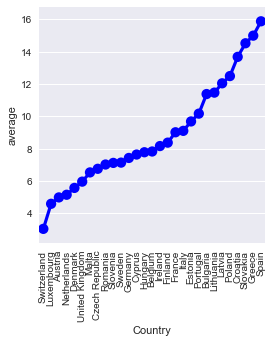

In [13]:
g= sns.factorplot(x="Country", y="average", data=unemploymentRates,color='b');
plt.xticks(rotation=90, fontsize = 10)
plt.show()

In [17]:
geo_json_data = json.load(open(EUROPE_JSON))
features = geo_json_data['features'][0]
print(features.keys())
print(features['properties'].keys())
print(geo_json_data['features'][32]['properties']['NAME'])

dict_keys(['type', 'properties', 'geometry'])
dict_keys(['FID', 'FIPS', 'ISO2', 'ISO3', 'UN', 'NAME', 'AREA', 'POP2005', 'REGION', 'SUBREGION', 'LON', 'LAT'])
Monaco


In [18]:
EU_coordinates = [54.526,15.2551] #y,x
m_europe = folium.Map(EU_coordinates, tiles='cartodbpositron', zoom_start=3.6)
geo_json_data = json.load(open(EUROPE_JSON))

m_europe.choropleth(geo_data= EUROPE_JSON,
                    data=unemploymentRates,
                    columns=['Country', 'average'],
                    key_on='feature.properties.NAME',
                    fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                    legend_name='Unemployment Rate (%)'
                   )
m_europe.save('UnemploymentEurope.html')
IFrame(src='UnemploymentEurope.html', width=860, height=450)

# Part 2

## Data Messaging

The excel file read from the AMSTAT does not include canton IDs (ZH, BE, ...) and should be reformated. We do this in the following cells:

In [19]:
# A list of 2 character code IDs for cantons:
canton_list = [['Zurich', 'Berne', 'Lucerne', 'Uri', 'Schwyz', 'Obwald', 'Nidwald',
       'Glaris', 'Zoug', 'Fribourg', 'Soleure', 'Bâle-Ville', 'Bâle-Campagne',
       'Schaffhouse', 'Appenzell Rhodes-Extérieures',
       'Appenzell Rhodes-Intérieures', 'St-Gall', 'Grisons', 'Argovie',
       'Thurgovie', 'Tessin', 'Vaud', 'Valais', 'Neuchâtel', 'Genève',
       'Jura'],['ZH','BE','LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR',
               'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG',
                'TI', 'VD', 'VS', 'NE', 'GE', 'JU']]

canton_dict = {canton_list[0][x] : canton_list[1][x] for x in range(len(canton_list[1]))}

In [22]:
DF = pd.read_excel('./2_1 Taux de chomage 2.xlsx', header=[0, 1]) # We both of the headers (measures and times)
DF.drop(('Mois', 'Mesures'), axis=1, inplace=True) # .. but discard the coulmn associated with their names
DF.columns = pd.MultiIndex.from_tuples(DF.columns.to_series())
DF = DF.transpose()

DF_main = DF.transpose().reset_index() # we transpose the frame, so that cantons are listed as rows. 
                                     # Their name is added as a feature.
    
DF_plot = (DF_main.iloc[:-1, :].drop('Chômeurs inscrits', level=1, axis=1) # we only keep the unemployment rate for now
                  .drop(['Total', 'matched_index'], axis=1, level=0)) # we drop the last 'Total' column and row.

_columns = [item[0] for item in DF_plot.columns.tolist()]
DF_plot.columns = _columns

# Changing the 'index' to Canton and adding the ID 
DF_plot=DF_plot.rename_axis({'index': 'Canton'}, axis=1).set_index('Canton')
DF_plot['ID'] = DF_plot.index.to_series().apply(lambda x: canton_dict[x])

display(DF_plot.head())

,Janvier 2017,Février 2017,Mars 2017,Avril 2017,Mai 2017,Juin 2017,Juillet 2017,Août 2017,Septembre 2017,ID
Canton,,,,,,,,,,
Zurich,3.9,3.9,3.8,3.6,3.5,3.4,3.4,3.4,3.3,ZH
Berne,3.0,3.0,2.9,2.7,2.6,2.4,2.4,2.5,2.4,BE
Lucerne,2.2,2.2,2.0,1.9,1.8,1.7,1.7,1.8,1.7,LU
Uri,1.5,1.4,1.3,1.2,1.0,0.8,0.7,0.6,0.6,UR
Schwyz,2.0,2.0,1.9,1.8,1.7,1.6,1.7,1.7,1.7,SZ


## Task Description 

> Go to the amstat website to find a dataset that includes the unemployment rates in Switzerland at a recent date.
Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

It was not immediately obvious which dataset we should choose. We knew had to choose the "Taux de chômage" as a metric, and also that it had to be granular enough to show Cantonale information. But the particular month in question was uncertain. So we decided to get the metric over the past year and plot a layered Choropleth map, and do a comparison between the different months. Our intuition is that the unemployment is more or less consistent throughout the year. 

We will verify this intuition, but first let's see the unemployment rates for 2017 on a layered Choropleth map:

## Map: The Unemployment Rates of Swiss Cantons in 2017

In [28]:
def save_map(_map, name): # Saves HTML maps
    _map.save(name)

In [29]:
from branca.colormap import linear

vmax = DF_plot.max(numeric_only=True).max() # The maximum (and minimum) is taken over all elments of the data frame to
                                            # ensure a fixed limits which is necessary for meaningful comparison.
vmin = DF_plot.min(numeric_only=True).min()

colormap = linear.OrRd.scale(vmin, vmax)
colormap.caption = 'Unemployment Rate (%)'

geo_path = r'topojson/ch-cantons.topojson.json'
geo_json_data = json.load(open(geo_path))

swiss_coord = [46.8182, 8.22]

ch_map = fo.Map(location=swiss_coord,
                tiles='cartodbpositron',
                zoom_start=8)

def add_choropleth_layers(month):
    df = DF_plot.set_index('ID')
    fo.TopoJson(
        geo_json_data, 
        'objects.cantons',
        name = month, 
        style_function = lambda feature: {
            'fillColor': colormap(df[month][feature['id']]),
            'color': 'black',
            'weight': 1,
            'dashArray': '5, 5',
            'fillOpacity': 0.7
        }).add_to(ch_map)
    return ch_map

months = DF_plot.drop('ID', axis=1).columns.tolist()
out_list = list(map(add_choropleth_layers, months))
ch_map.add_child(colormap)
fo.LayerControl(collapsed=False).add_to(ch_map)

    
save_map(out_list[-1], 'canton_unemp_17.html')

from IPython.display import IFrame
IFrame(src='canton_unemp_17.html', width=860, height=450)

### Analysis
The map above is interactive and layers corresponding to different months can be activated or disactivated. From comparing and anlyzing the different data we observe two trends:

1. Generally speaking the rates are consistant throughout the year. (We will test this in the next section)
2. The French speaking cantons are in a worse shape than their Italian, and especially German speaking cantons. 

*Zurich* is an interesting exception. It has decidedly one of the highest unemployment rates in the Germanic part of Switzerland. We attribute this to the fact that this Canton is one of the financial centers of the Europe, and naturally attracts a lot potential workers. However, due to limited quotas for working permits, companies cannot employ many of them, thus the significant unemployment rate.

## Visualizing The Variance of Unemployment Rates 

We calculate and plot the variance over the year:

Canton
Zurich                          1.101211
Berne                           0.599010
Lucerne                         0.279785
Uri                             0.145488
Schwyz                          0.231349
Obwald                          0.047507
Nidwald                         0.075450
Glaris                          0.415415
Zoug                            0.453239
Fribourg                        0.625071
Soleure                         0.686602
Bâle-Ville                      1.262315
Bâle-Campagne                   0.685866
Schaffhouse                     0.938192
Appenzell Rhodes-Extérieures    0.221493
Appenzell Rhodes-Intérieures    0.093652
St-Gall                         0.449454
Grisons                         0.269583
Argovie                         0.833238
Thurgovie                       0.428021
Tessin                          1.064861
Vaud                            1.911529
Valais                          1.688034
Neuchâtel                       3.228019
Genève   

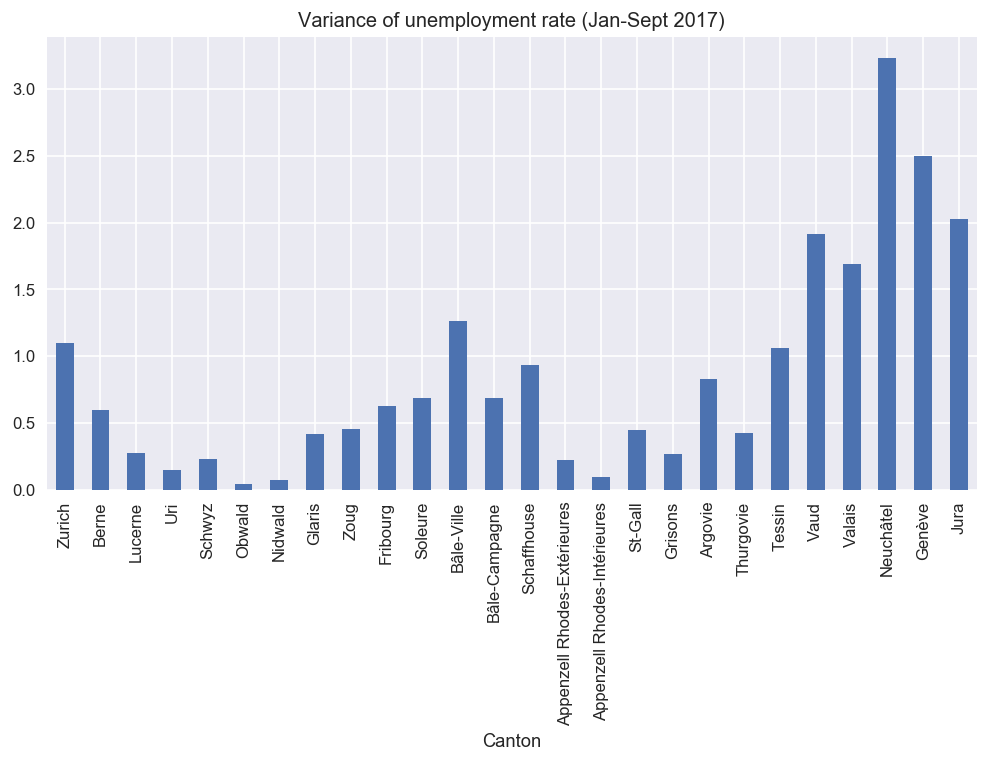

In [48]:
fig = plt.figure(figsize=(10, 5), dpi= 120)
ax1 = plt.subplot(1,1,1)
unemp_var = DF_plot.var(axis=1)
display(unemp_var)
DF_plot_var = DF_plot
DF_plot_var['variance'] = unemp_var
unemp_var.plot.bar(title='Variance of unemployment rate (Jan-Sept 2017)', ax=ax1)

### Analysis
So it seems from the bar chart above that for most cantons, indeed the unemployment rate does not change much over the course of the year. There are exceptions though. We consider a comparison threshold equal to 1, and observe the Cantons that have a variance more than 1: 


In [50]:
DF_plot_var.loc[DF_plot_var.variance > 1].sort_values(by='variance', ascending=False)

,Janvier 2017,Février 2017,Mars 2017,Avril 2017,Mai 2017,Juin 2017,Juillet 2017,Août 2017,Septembre 2017,ID,variance
Canton,,,,,,,,,,,
Neuchâtel,6.6,6.5,6.2,5.9,5.6,5.2,5.3,5.3,5.1,NE,3.228019
Genève,5.7,5.5,5.4,5.3,5.2,5.1,5.1,5.2,5.2,GE,2.496721
Jura,5.3,5.2,4.9,4.7,4.4,4.3,4.4,4.7,4.4,JU,2.028631
Vaud,5.2,5.0,4.8,4.6,4.4,4.2,4.3,4.4,4.3,VD,1.911529
Valais,5.2,4.6,3.9,3.7,3.3,2.9,2.9,2.9,2.8,VS,1.688034
Bâle-Ville,4.2,4.1,4.0,3.9,3.7,3.6,3.5,3.7,3.5,BS,1.262315
Zurich,3.9,3.9,3.8,3.6,3.5,3.4,3.4,3.4,3.3,ZH,1.101211
Tessin,4.0,4.0,3.6,3.3,3.1,3.0,3.0,3.1,3.1,TI,1.064861


Interestingly enough, most of these cantons seem to be located in the *Suisse Romand*. Let's see this on the map:

## Map: The Variance of Unemployment Rates of Swiss Cantons in 2017

In [97]:
def plot_choro(_DF, DF_ID_label, data_column_label, colorbar_caption=None):
    
            
    from branca.colormap import linear
    from IPython.display import display
 
    vmax = _DF[data_column_label].max()
    vmin = _DF[data_column_label].min()

    colormap = linear.OrRd.scale(vmin, vmax).to_step(10)
    colormap.caption = colorbar_caption
    
    geo_path = r'topojson/ch-cantons.topojson.json'
    geo_json_data = json.load(open(geo_path))

    swiss_coord = [46.8182, 8.22]

    ch_map = fo.Map(location=swiss_coord,
                    tiles='cartodbpositron',
                    zoom_start=8)

    _df = _DF.set_index(DF_ID_label)

    def coloring(colormap, _df, data_column_label, feature):
        try: 
            return colormap(_df[data_column_label][feature['id']])
        except KeyError:
            return '#000000'
        
    fo.TopoJson(
        geo_json_data, 
        'objects.cantons',
        name=data_column_label,
        style_function = lambda feature: {
            'fillColor': coloring(colormap, _df, data_column_label, feature),
            'color': 'black',
            'weight': 1,
            'dashArray': '5, 5',
            'fillOpacity': 0.7
        }
    ).add_to(ch_map)
    ch_map.add_child(colormap)
#     fo.LayerControl().add_to(ch_map)
    
#     display(ch_map)
#     save_map(ch_map, 'canton_var_17.html')
#     save_map(ch_map, 'canton_black_var_17.html')
    return

plot_choro(DF_plot_var, 'ID', 'variance', 'Variance of Unemployment Rate')
IFrame(src='canton_var_17.html', width=860, height=450)


## Map: The Most Fluctuating Job Markets in Switzerland in 2017

We filter only the countries that have a variance more than 1 (the rest are blacked-out):

In [98]:
plot_choro(DF_plot_var.loc[DF_plot_var.variance > 1], 'ID', 'variance', 'Variance of Unemployment Rate')
IFrame(src='canton_black_var_17.html', width=860, height=450)

### Analysis
We observe that indeed, the job market is more fluctuating in the French and Italian Speaking parts of Switzerland. The German speaking cantons enjoy a more stable job market (they are blacked-out in the above figure because they have a variance less than 10% in their unemployment rate in 2017).

The second insight comes when we compare this map with the general map of unemployment: although generally Italian speaking cantons are doing well (almost as well as their German speaking cantons), heir job markets suffer from a degree of unstability. 

The third insight also has to do with our previous exception: *Zurich*. Zurich not only has an unusually high unemployment rate for a German speaking canton, but it also suffers form a relatively unstable job market as well. We believe that this is caused by the same reasons we mentioned earlier. 

## Making a decision

The variablity of the job market for some cantons (especially the French and Italian speaking ones) means that past data might not give much insight about the present trends. As such, we decided to work with the latest statistics, published for the **September of 2017**. This will be used for the following questions.

## Map: The Cantonal Swiss Unemployment Rates in September 2017 

In [65]:
from branca.colormap import linear

vmax = DF_plot.max(numeric_only=True).max()
vmin = DF_plot.min(numeric_only=True).min()

colormap = linear.OrRd.scale(vmin, vmax)
colormap.caption = 'Unemployment Rate (%)'


geo_path = r'topojson/ch-cantons.topojson.json'
geo_json_data = json.load(open(geo_path))

swiss_coord = [46.8182, 8.22]

ch_map = fo.Map(location=swiss_coord,
                tiles='cartodbpositron',
                zoom_start=8)
df = DF_plot.set_index('ID')

fo.TopoJson(
    geo_json_data, 
    'objects.cantons',
    name='Septembre 2017',
    style_function = lambda feature: {
        'fillColor': colormap(df['Septembre 2017'][feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.7
    }
).add_to(ch_map)
ch_map.add_child(colormap)

fo.LayerControl(collapsed=False).add_to(ch_map)
ch_map
save_map(ch_map, 'sept_17_.html')

IFrame(src='sept_17_.html', width=860, height=450)

# Task 2-2: The Definition of Unemployement Rate

In [68]:
DF_sept17 = pd.read_excel('./2_1 Taux de chomage 3_septembre17.xlsx', header=[0, 1])
DF_sept17 = DF_sept17.drop(['Mois', 'Total'], axis=1) # Droping the Month name (Feburary 2017) and the Total Columns
DF_sept17 = DF_sept17[:-1] # Dropping the Total Row
DF_sept17.columns = DF_sept17.columns.droplevel(level=0) #Reducing the MultiIndex column to a simple Index
DF_sept17.reset_index(inplace=True) # Resetting the row indices to get the canton names as a feature ('index') 

# Adding the Canton IDs
canton_list = [['Zurich', 'Berne', 'Lucerne', 'Uri', 'Schwyz', 'Obwald', 'Nidwald',
       'Glaris', 'Zoug', 'Fribourg', 'Soleure', 'Bâle-Ville', 'Bâle-Campagne',
       'Schaffhouse', 'Appenzell Rhodes-Extérieures',
       'Appenzell Rhodes-Intérieures', 'St-Gall', 'Grisons', 'Argovie',
       'Thurgovie', 'Tessin', 'Vaud', 'Valais', 'Neuchâtel', 'Genève',
       'Jura'],['ZH','BE','LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR',
               'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG',
                'TI', 'VD', 'VS', 'NE', 'GE', 'JU']]

canton_dict = {canton_list[0][x] : canton_list[1][x] for x in range(len(canton_list[1]))}

DF_sept17['ID'] = DF_sept17['index'].apply(lambda x: canton_dict[x])

DF_sept17.head()

,index,Taux de chômage,Chômeurs inscrits,Entrées au chômage,Sortis du chômage,Demandeurs d'emploi,Demandeurs d'emploi non chômeurs,Demandeurs d'emploi entrés,Demandeurs d'emploi sortis,ID
0,Zurich,3.3,27225,5067,5340,34156,6931,5071,5438,ZH
1,Berne,2.4,13658,2627,2797,18385,4727,2590,2596,BE
2,Lucerne,1.7,3885,1166,1275,6756,2871,945,1043,LU
3,Uri,0.6,112,43,54,257,145,52,64,UR
4,Schwyz,1.7,1455,345,363,2229,774,346,362,SZ


## Calculating the new "Taux de chômage"

We need to calculate the size of the Active Population ("Population Actif"). the AMSTAT website clearly defines the unemployement rate ("taux de chomage") as:

 > *Taux de chômage*: Nombre de chômeurs inscrits au jour de référence (dernier jour du mois) divisé par le nombre de personnes actives, multiplié par 100.
 
 > *Personnes actives*:  Personnes actives occupées (au moins une heure par semaine) ou sans emploi.
Le taux de chômage est calculé en prenant comme dénominateur le nombre de personnes actives.

To calculate the active population using this definition we have:
$$
TdC = \frac{CI}{PA} \Longrightarrow PA = \frac{CI}{TdC}
$$

In the aboce forumla: 
- $TdC$ = Taux de chômage (Unemployment Rate)
- $CI$ = Chômeurs inscrits	(the registered jobless)
- $PA$ = Population Active (Active Population)

So the definition given in the assignment description is mistaken: "the number of people looking for a job divided by the size of the active population (scaled by 100)."


**Note** Follwing a long discussion on Mattermost, it was decided that indeed the first definition is correct. It was also stated that:

> The goal of the question is to show the difference in statistics when you take into account jobless or non-jobless job-seekers. Regardless of the definition of the unemployment rate itself, *this question is still valid (it's just not removing it's adding then, if that's the way you proceeded)*.

So the new unemployment rate is calculated as follows:

$$
TdC' = \frac{DdE}{PA} 
$$

In the aboce forumla: 
- $TdC' $ = The new "taux de chômage"
- $DdE$ = Demandeurs d'emploi (Jobseekers)
- $PA$ = Population Active (Active Population) as calculated in the previous formula.

Moreover, we observe the relation between the new $TdC'$ and the old $TdC$:
$$
 TdC' = \frac{DdE}{PA} = \frac{DdE}{\frac{CI}{TdC}} = \left(\frac{DdE}{CI}\right) TdC
$$

We will calculate active population and the new unemployment rate for each Canton:

In [69]:
def cal_active_population(row):
    active_pop = row["Chômeurs inscrits"]/(0.01*row["Taux de chômage"])
    return np.floor(active_pop)

def cal_unemployment_rate_def2(row):
    unemployment_rate = 100*row["Demandeurs d'emploi"]/float(row["Population Active"])
    return unemployment_rate

DF_sept17['Population Active'] = DF_sept17.apply(cal_active_population, axis=1)
DF_sept17['Taux de chômage_def2'] = DF_sept17.apply(cal_unemployment_rate_def2, axis=1)

DF_sept17.head()

,index,Taux de chômage,Chômeurs inscrits,Entrées au chômage,Sortis du chômage,Demandeurs d'emploi,Demandeurs d'emploi non chômeurs,Demandeurs d'emploi entrés,Demandeurs d'emploi sortis,ID,Population Active,Taux de chômage_def2
0,Zurich,3.3,27225,5067,5340,34156,6931,5071,5438,ZH,825000.0,4.140121
1,Berne,2.4,13658,2627,2797,18385,4727,2590,2596,BE,569083.0,3.230636
2,Lucerne,1.7,3885,1166,1275,6756,2871,945,1043,LU,228529.0,2.956299
3,Uri,0.6,112,43,54,257,145,52,64,UR,18666.0,1.376835
4,Schwyz,1.7,1455,345,363,2229,774,346,362,SZ,85588.0,2.604337


As a snaity check, we make sure that indeed 
$$
Jobseekers =  Registered Jobless + Employed Jobseekers
$$

In [70]:
def sanity_check(row):
    return row["Demandeurs d'emploi"] == row["Chômeurs inscrits"] + row["Demandeurs d'emploi non chômeurs"]

DF_sept17.apply(sanity_check, axis=1)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
dtype: bool

## Choropleth Map

In [71]:
# Taking the necessary columns for the Choropleth Map
DF_sept17_plot = DF_sept17[['ID', 'Taux de chômage', 'Taux de chômage_def2',]]
DF_sept17_plot.head()

,ID,Taux de chômage,Taux de chômage_def2
0,ZH,3.3,4.140121
1,BE,2.4,3.230636
2,LU,1.7,2.956299
3,UR,0.6,1.376835
4,SZ,1.7,2.604337


In [75]:
from branca.colormap import linear

# df = DF_sept17_plot
df = DF_sept17_plot.set_index('ID')


vmax = DF_sept17_plot.max(numeric_only=True).max()
vmin = DF_sept17_plot.min(numeric_only=True).min()

colormap = linear.OrRd.scale(vmin, vmax).to_step(10)
colormap.caption = 'Unemployement Rate (%)'

geo_path = r'topojson/ch-cantons.topojson.json'
geo_json_data = json.load(open(geo_path))

swiss_coord = [46.8182, 8.22]

ch_map = fo.Map(location=swiss_coord,
                tiles='cartodbpositron',
                zoom_start=8)



fo.TopoJson(
    geo_json_data, 
    'objects.cantons',
    name = 'Unemployement Rate (Original Definition)', 
    style_function = lambda feature: {
        'fillColor': colormap(df['Taux de chômage'][feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.7
    }).add_to(ch_map)

fo.TopoJson(
    geo_json_data, 
    'objects.cantons',
    name = 'Unemployement Rate (New Definition)', 
    style_function = lambda feature: {
        'fillColor': colormap(df['Taux de chômage_def2'][feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.7
    }).add_to(ch_map)

ch_map.add_child(colormap)
fo.LayerControl(collapsed=False).add_to(ch_map)

display(ch_map)
# display(ch_map)
print("=== Plese enable the Original Definition on one map and the New Defintion on the other === ")
save_map(ch_map, 'new_def.html')

IFrame(src='new_def.html', width=860, height=450)


=== Plese enable the Original Definition on one map and the New Defintion on the other === 


### Analysis
Comparing the two maps above (each of each include the two maps which can be turned on and off for better comparison), we observe the general trend that the new definition which includes the already-employed job seekers,gives higher unemployment rates. We verify this assumption with a bar chart:

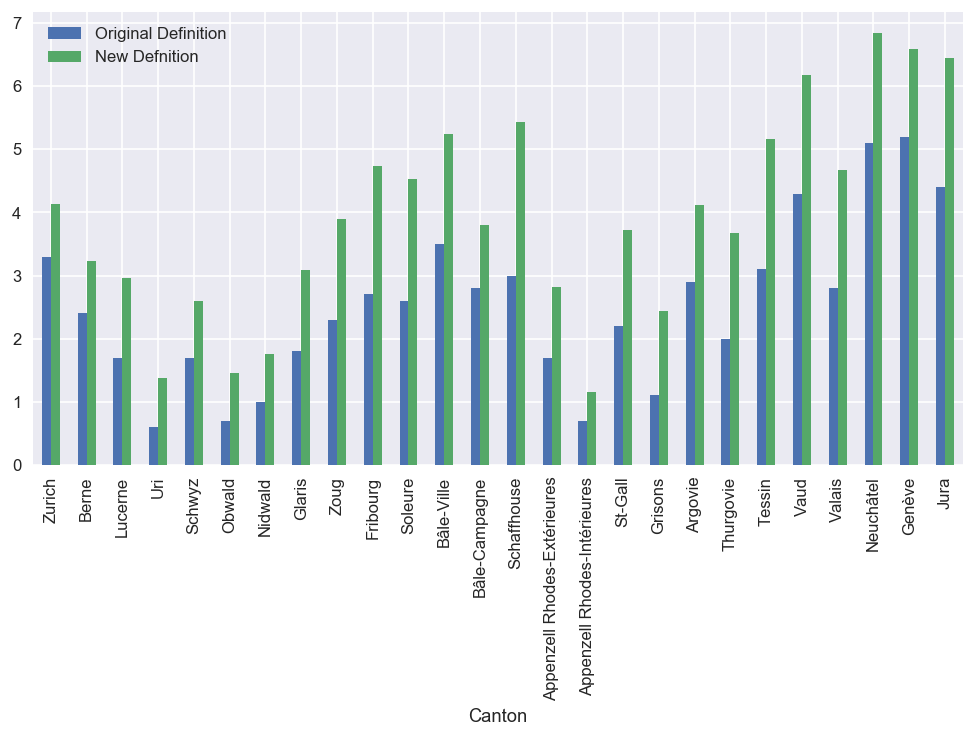

In [76]:
%matplotlib inline
fig = plt.figure(figsize=(10, 5), dpi= 120)
ax1 = plt.subplot(1,1,1)
DF_sept17_barchart = DF_sept17[['index', 'Taux de chômage', 'Taux de chômage_def2']] \
                        .rename_axis({'index': 'Canton', 'Taux de chômage': 'Original Definition',
                                                'Taux de chômage_def2': 'New Defnition'}, axis=1).set_index('Canton')
# DF_sept17_barchart
DF_sept17_barchart.plot.bar(ax=ax1)
# DF_sept17_barchart.plot.bar(x='index', y='Taux de chômage')


# Part 3

## Task 3.1
First, we need to show the difference in unemployment rates between swiss and foreigners. We decided to take the available data of the current year (2017).

Instead of showing two different maps, we compute the difference of the unemployment rate between swiss and foreigners per canton, and then we draw only one map showing this difference.

The dataset contains unemployment rate for swiss and foreign workers per month and canton during 2017 for far. 

In [77]:
# load the csv file
df = pd.read_csv('./unemployment_swiss_foreigner.csv', encoding='utf-8')

We build a dictionnary to pass from canton full name to the 2-letters acronym as the topojson file uses that

In [78]:
# dictionary from canton full name to canton short name
canton_list = [['Zurich', 'Berne', 'Lucerne', 'Uri', 'Schwyz', 'Obwald', 'Nidwald',
                'Glaris', 'Zoug', 'Fribourg', 'Soleure', 'Bâle-Ville', 'Bâle-Campagne',
                'Schaffhouse', 'Appenzell Rhodes-Extérieures', 'Appenzell Rhodes-Intérieures',
                'St-Gall', 'Grisons', 'Argovie', 'Thurgovie', 'Tessin', 'Vaud', 'Valais',
                'Neuchâtel', 'Genève', 'Jura'],
               ['ZH','BE','LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR','SO', 'BS', 'BL',
                'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']]

canton_dict = {canton_list[0][x] : canton_list[1][x] for x in range(len(canton_list[1]))}

In [79]:
# rename columns
unemployment = df[['Unnamed: 0', 'Nationalité', 'Total']]
unemployment.columns = ['Canton', 'Nationalité', 'Total']

# drop unnecessary index
unemployment = unemployment.drop(unemployment.index[0])

# add column of short name
unemployment['short_name'] = unemployment.Canton.map(lambda x: canton_dict[x] if x in canton_dict else x)

# change total column to numercic values
unemployment = unemployment.apply(pd.to_numeric, errors='ignore')
unemployment.head()

,Canton,Nationalité,Total,short_name
1,Zurich,Etrangers,5.3,ZH
2,Zurich,Suisses,2.4,ZH
3,Berne,Etrangers,5.7,BE
4,Berne,Suisses,1.8,BE
5,Lucerne,Etrangers,4.0,LU


As the rate is always bigger for foreigners, all differences have the same sign, therfore we can put all differences positive.

In [80]:
# dataframe containing the rate difference between foreigners and swiss' unemployment rate
un_diff = pd.DataFrame()
un_diff['short_name'] = unemployment.short_name
un_diff['difference'] = unemployment.groupby(['Canton']).diff(-1)
un_diff = un_diff.dropna()
un_diff.head()

,short_name,difference
1,ZH,2.9
3,BE,3.9
5,LU,2.8
7,UR,3.4
9,SZ,2.4


Now we can draw the choropleth map using the 2 column dataframe containing the difference rate. We would have used a 2-color scale if the differences were positive and negative (for example white in the middle, blue for one side and red for the other) but as the scale is only positive, we only used 1 color.  

In [81]:
geo_path = r'topojson/ch-cantons.topojson.json'
geo_json_data = json.load(open(geo_path))

swiss_coord = [46.8182, 8.22]

In [82]:
# choropleth of difference rate
ch_map = folium.Map(location=swiss_coord,
                tiles='cartodbpositron',
                zoom_start=8)

ch_map.choropleth(geo_data=geo_json_data, data=un_diff,
                  columns=['short_name', 'difference'],
                  key_on='feature.id',
                  fill_color='YlGn', fill_opacity=0.9, line_opacity=0.8,
                  legend_name = "rate difference between unemployed foreigners and swiss people in (%)",
                  topojson = 'objects.cantons')

#Save the map as an HTML file
fn='swiss_diff.html'
ch_map.save(fn)
ch_map

[Link to the map](swiss_diff.html)

We can see that the differences are more visible in Jura and Valais, follow by Berne, Neuchâtel and Argovie.
Why do you think that is ?
Jura has a lot of French people coming to work in Switzerland because of the salary difference, also they have are more focused on the primary sector, that would explain why Geneva, that also has French workers coming to work, doesn's have this difference. For the Valais case, it is mostly the older foreign population (24+) that are unemployed, but the trend showed in part 3.2 demonstrate that this is going better since the beginning of the year.


**Just for the exercise, we also show the map of swiss and foreigners unemployement rates, like it was naively proposed:**

In [83]:
# choropleth of swiss workers unemployment rate
un_swiss = unemployment.loc[unemployment.Nationalité == 'Suisses']

ch_map = folium.Map(location=swiss_coord,
                tiles='cartodbpositron',
                zoom_start=8)

ch_map.choropleth(geo_data=geo_json_data, data=un_swiss,
                  columns=['short_name', 'Total'],
                  key_on='feature.id',
                  fill_color='OrRd', fill_opacity=0.9, line_opacity=0.8,
                  legend_name = "unemployment rate for swiss workers in (%)",
                  topojson = 'objects.cantons')

#Save the map as an HTML file
fn='swiss_unemployment.html'
ch_map.save(fn)
ch_map

We see that the rate is higher in the french part, specially with on the border with France. Fribourg and Zurich seemed to not follow the east/west trend, Fribourg is lower than other french canton, Zurich is a bit higher than its neighboring cantons.

[Link to the map](swiss_unemployment.html)

In [84]:
# choropleth of foreigner workers unemployment rate
un_foreigners = unemployment.loc[unemployment.Nationalité == 'Etrangers']

ch_map = folium.Map(location=swiss_coord,
                tiles='cartodbpositron',
                zoom_start=8)

ch_map.choropleth(geo_data=geo_json_data, data=un_foreigners,
                  columns=['short_name', 'Total'],
                  key_on='feature.id',
                  fill_color='BuPu', fill_opacity=0.9, line_opacity=0.8,
                  legend_name = "unemployment rate for foreigner workers in (%)",
                  topojson = 'objects.cantons')

#Save the map as an HTML file
fn='forei_unemployment.html'
ch_map.save(fn)
ch_map

This one also follow the east/west trend, with no outlier. Jura has the highest rate by far.

[Link to the map](forei_unemployment.html)

## Task 3.2
Now we want to display the same analysis and add the differences between age groups. Saldy, the amstat website doesn't allow to simply get the data with the nationaly factor and the age factor, we can only get one at the time.

One way to work around this limitation is to divide in two groups : "chômeurs jeunes" and "chômeurs adultes" (young unemployed and adult unemployed). Young is defined to be between 15-24 and adult is 24+.

The amstat website allow us to get total number of unemployed and the total number of young unemployed, along with the corresponding rates, with the nationality factor and per canton. From this values we can get the unemployment rate for adults.

In [85]:
import numpy as np
# load the csv file
df = pd.read_csv('./unemployment_swiss_foreigner_young_total.csv', encoding='utf-16', index_col=[0,1,2]).T
df = df.replace('...', np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
df.head()


Canton                Zurich                                               \
Nationalité        Etrangers                                                
Valeurs      Taux de chômage Taux de chômage des jeunes Chômeurs inscrits   
Janvier 2017             6.6                        6.9             15060   
Février 2017             6.5                        6.8             14787   
Mars 2017                6.3                        6.6             14382   
Avril 2017               6.0                        5.8             13572   
Mai 2017                 5.7                        5.4             13097   

Canton                                                                   \
Nationalité                          Suisses                              
Valeurs      Chômeurs jeunes Taux de chômage Taux de chômage des jeunes   
Janvier 2017            1194             2.9                        3.5   
Février 2017            1185             2.8                        3.3   
Mars 2017               1147             2.8                        3.1   
Avril 2017              1009             2.7                        2.8   
Mai 2017                 936             2.6                        2.6   

Canton                                                   Berne  \
Nationalité                                          Etrangers   
Valeurs      Chômeurs inscrits Chômeurs jeunes Taux de chômage   
Janvier 2017             17327            2606             7.5   
Février 2017             16832            2438             7.4   
Mars 2017                16459            2282             7.1   
Avril 2017               15970            2094             6.8   
Mai 2017                 15527            1962             6.2   

Canton                                        ...                  Genève  \
Nationalité                                   ...                 Suisses   
Valeurs      Taux de chômage des jeunes       ...       Chômeurs inscrits   
Janvier 2017                        8.1       ...                    6541   
Février 2017                        8.2       ...                    6342   
Mars 2017                           7.8       ...                    6274   
Avril 2017                          7.2       ...                    6143   
Mai 2017                            6.6       ...                    6093   

Canton                                  Jura                             \
Nationalité                        Etrangers                              
Valeurs      Chômeurs jeunes Taux de chômage Taux de chômage des jeunes   
Janvier 2017             635            11.9                        NaN   
Février 2017             587            11.5                        NaN   
Mars 2017                549            10.7                        NaN   
Avril 2017               500            10.0                        NaN   
Mai 2017                 485             9.5                        NaN   

Canton                                                          \
Nationalité                                            Suisses   
Valeurs      Chômeurs inscrits Chômeurs jeunes Taux de chômage   
Janvier 2017               666              68             4.1   
Février 2017               645              66             4.1   
Mars 2017                  598              67             3.8   
Avril 2017                 561              55             3.7   
Mai 2017                   534              43             3.5   

Canton                                                                     
Nationalité                                                                
Valeurs      Taux de chômage des jeunes Chômeurs inscrits Chômeurs jeunes  
Janvier 2017                        5.6              1264             260  
Février 2017                        5.6              1270             260  
Mars 2017                           4.8              1184             223  
Avril 2017                          4.5           

We can get the #young and #workers by dividing the number of unemployed by the unemployment rate.

The adult rate can be calculated the following way: #adult_unemployed/#adult

Where #adult_unemployed = #total_unemployed - #young_unemployed

and #adult = #workers -#young

In [86]:
df_final = pd.DataFrame()

# for each ['Canton', 'Nationality'] we compute the unemployment rate of adults
for title,table in df.groupby(level=[0,1], axis=1):
    
    # number of unemployed for each category
    num_un_young = table[title[0]][title[1]]['Chômeurs jeunes']
    num_un_total = table[title[0]][title[1]]['Chômeurs inscrits']
    num_un_adult = num_un_total - num_un_young
    
    # rate for young and total
    rate_un_young = table[title[0]][title[1]]['Taux de chômage des jeunes']
    rate_un_total = table[title[0]][title[1]]['Taux de chômage']
    
    # total number for each category, mutiply by 1.0 to have float instead of int
    num_young = num_un_young / (rate_un_young * 0.01)
    num_total = num_un_total / (rate_un_total * 0.01)
    num_adult = num_total - num_young
    
    # rate for adults
    rate_un_adult = (num_un_adult / num_adult)*100
    
    # add indexes for the multi-level indexing
    rate_un_young = pd.concat([pd.Series([title[0],title[1],'rate_un_young']), rate_un_young])
    rate_un_adult = pd.concat([pd.Series([title[0],title[1],'rate_un_adult']), rate_un_adult])
    rate_un_total = pd.concat([pd.Series([title[0],title[1],'rate_un_total']), rate_un_total])

    # dataframe with the rates for young, adult and total
    temp_df = pd.DataFrame(data = [rate_un_young, rate_un_adult, rate_un_total])
    
    # append to final dataframe
    df_final = pd.concat((df_final, temp_df), axis=0)
                                 
df_final = df_final.set_index([0,1,2]).T

In [87]:
df_final.head()

0            Appenzell Rhodes-Extérieures                              \
1                               Etrangers                               
2                           rate_un_young rate_un_adult rate_un_total   
Janvier 2017                          NaN           NaN           4.4   
Février 2017                          NaN           NaN           4.2   
Mars 2017                             NaN           NaN           3.8   
Avril 2017                            NaN           NaN           3.9   
Mai 2017                              NaN           NaN           3.7   

0                                                       \
1                  Suisses                               
2            rate_un_young rate_un_adult rate_un_total   
Janvier 2017           1.6      1.480841           1.5   
Février 2017           1.6      1.480831           1.5   
Mars 2017              1.4      1.400000           1.4   
Avril 2017             1.2      1.317293           1.3   
Mai 2017               1.2      1.317233           1.3   

0            Appenzell Rhodes-Intérieures                              \
1                               Etrangers                               
2                           rate_un_young rate_un_adult rate_un_total   
Janvier 2017                          NaN           NaN           6.1   
Février 2017                          NaN           NaN           5.1   
Mars 2017                             NaN           NaN           4.3   
Avril 2017                            NaN           NaN           2.8   
Mai 2017                              NaN           NaN           2.5   

0                               ...               Zoug                \
1                  Suisses      ...          Etrangers       Suisses   
2            rate_un_young      ...      rate_un_total rate_un_young   
Janvier 2017           0.7      ...                4.5           1.9   
Février 2017           0.5      ...                4.5           1.9   
Mars 2017              0.4      ...                4.4           1.7   
Avril 2017             0.5      ...                4.3           1.7   
Mai 2017               0.2      ...                4.2           1.5   

0                                               Zurich                \
1                                            Etrangers                 
2            rate_un_adult rate_un_total rate_un_young rate_un_adult   
Janvier 2017      1.900000           1.9           6.9      6.575382   
Février 2017      1.900000           1.9           6.8      6.475113   
Mars 2017         1.929096           1.9           6.6      6.275280   
Avril 2017        1.813715           1.8           5.8      6.016663   
Mai 2017          1.841066           1.8           5.4      5.724478   

0                                                                     
1                                Suisses                              
2            rate_un_total rate_un_young rate_un_adult rate_un_total  
Janvier 2017           6.6           3.5      2.814585           2.9  
Février 2017           6.5           3.3      2.729941           2.8  
Mars 2017              6.3           3.1      2.757053           2.8  
Avril 2017             6.0           2.8      2.685526           2.7  
Mai 2017               5.7           2.6      2.600000           2.6  

[5 rows x 156 columns]

We can see that some columns are missing the values. It's because some small canton don't have the unemployment rate of young people (Appenzell, Uri,...).

Next step is to plot everything with bars. We did it in two different ways:

1) New plot for each month

This one is good to see the different trend amoug cantons. We can see that smaller canton have low rate of unemployment and no data for the foreigners. Valais has a really high rate for foreigners. In general, for swiss workers, the rate is little higher for the young, while this is not always true for foreigner workers.

2) New plot for each canton

This one is better in terme of vizualization in time of each canton. For example, we can see that Valais is getting better since the beginning of the year with the unemployment rate of foreigner adult workers. Most of the time, foreigner workers have higher rates, expect for Geneva where the rates are pretty similar. 

In [88]:
# change the size of plots for better vizulization
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/mohammad/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['table', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


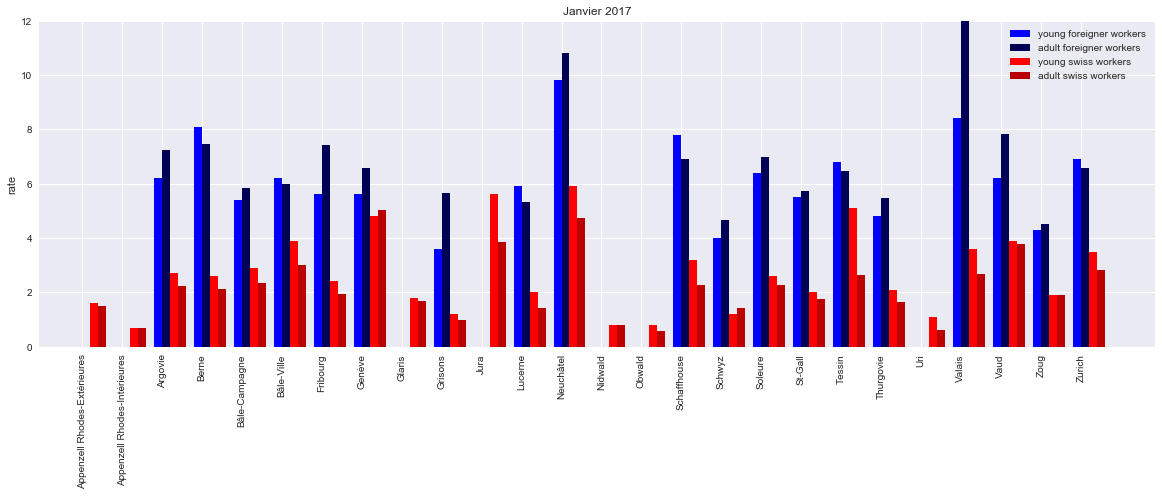

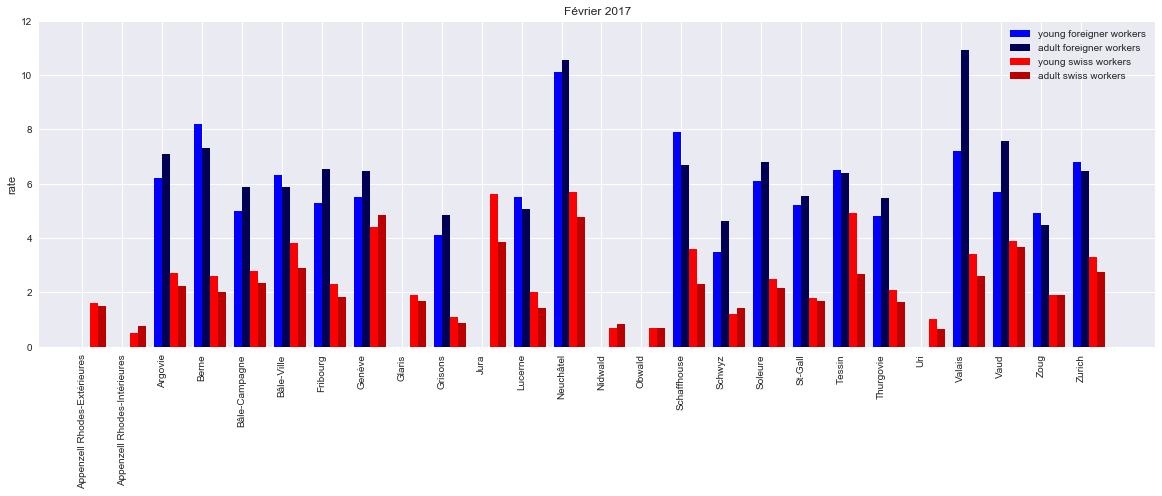

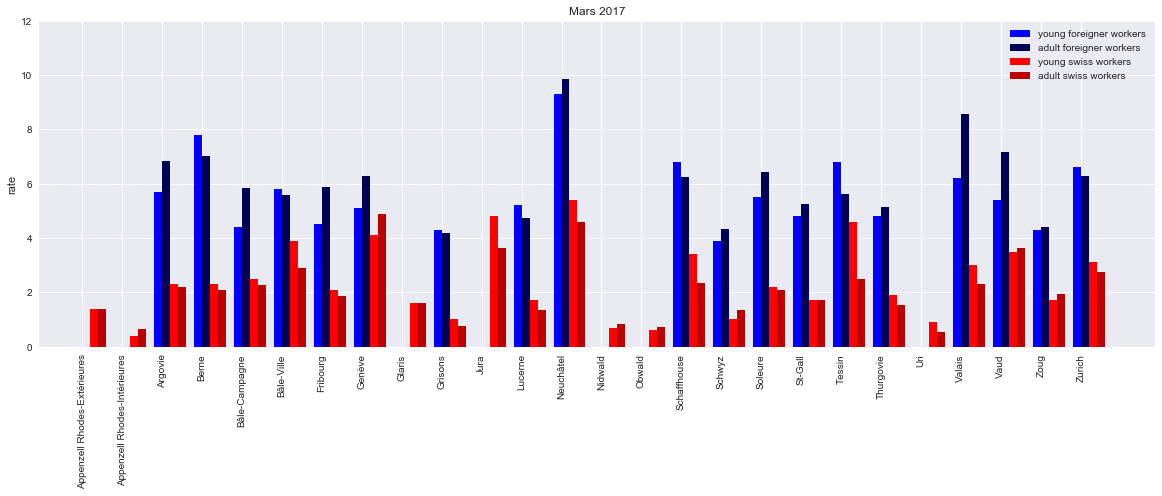

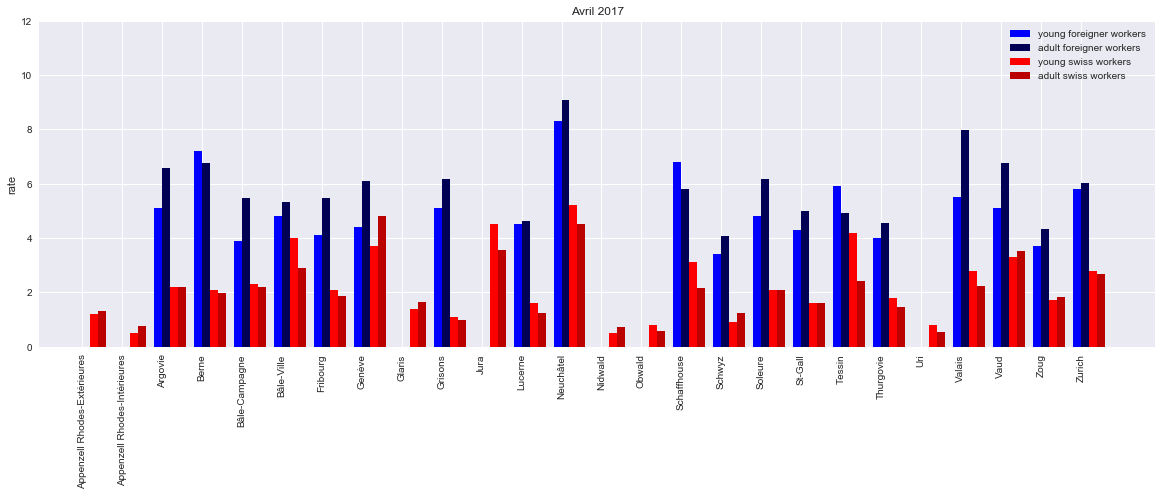

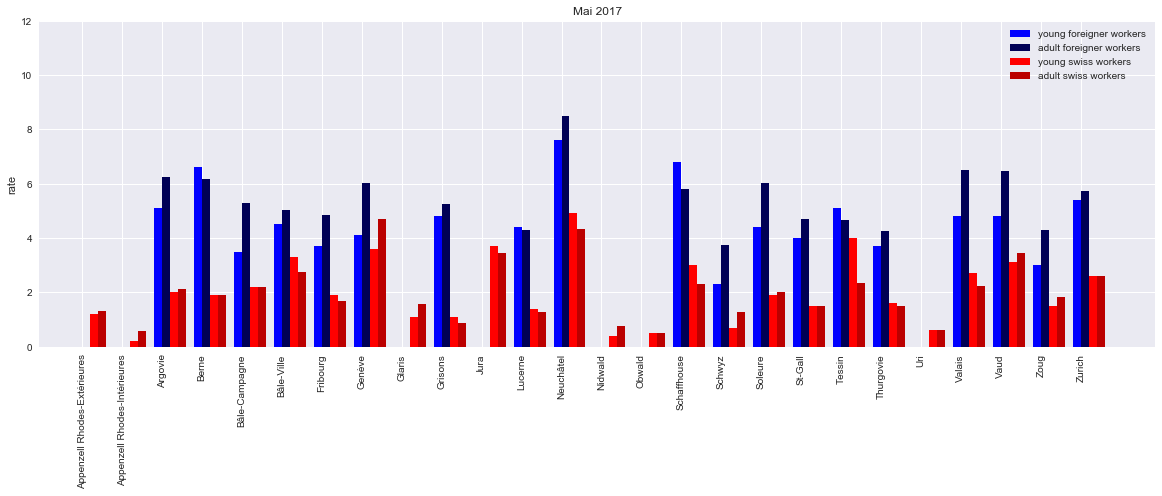

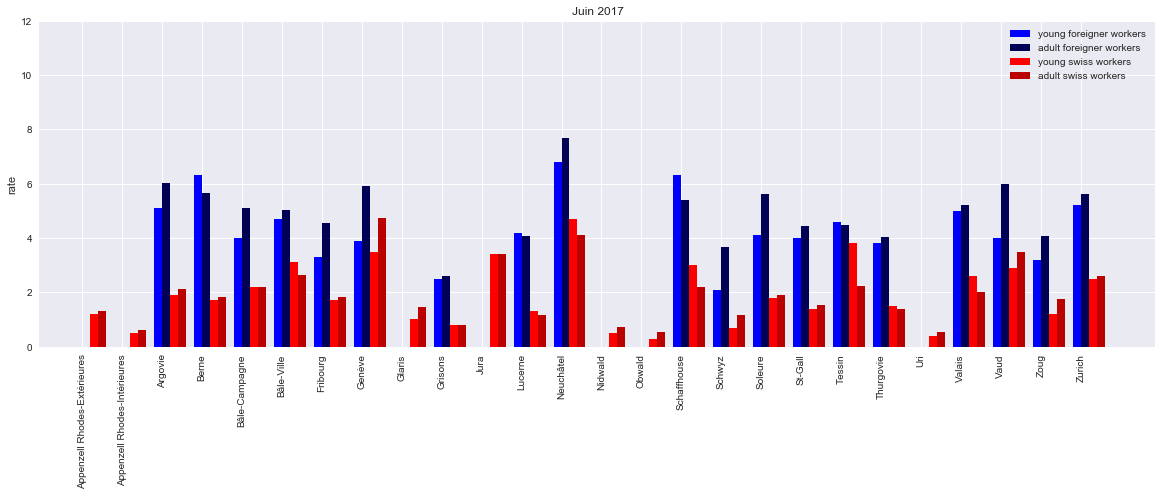

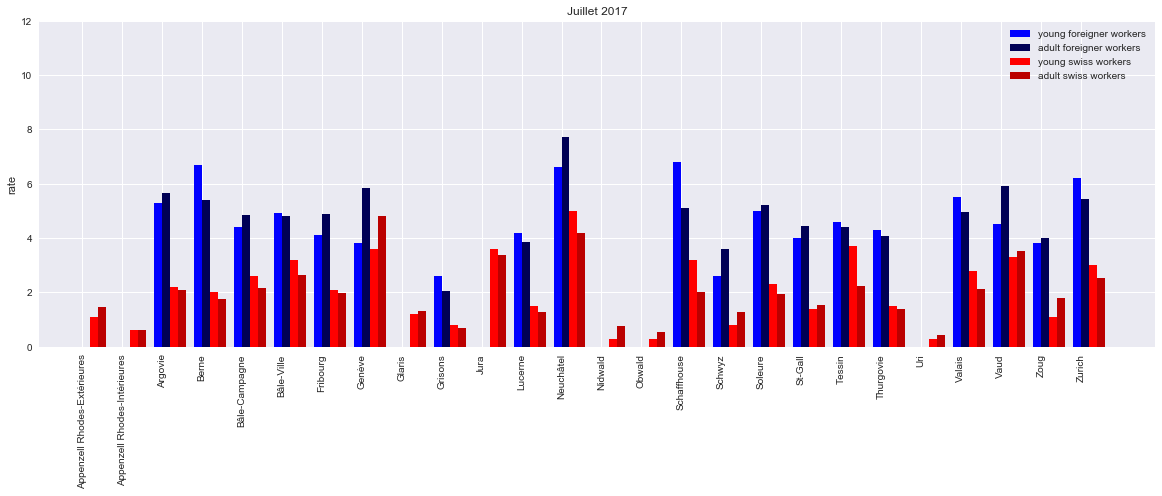

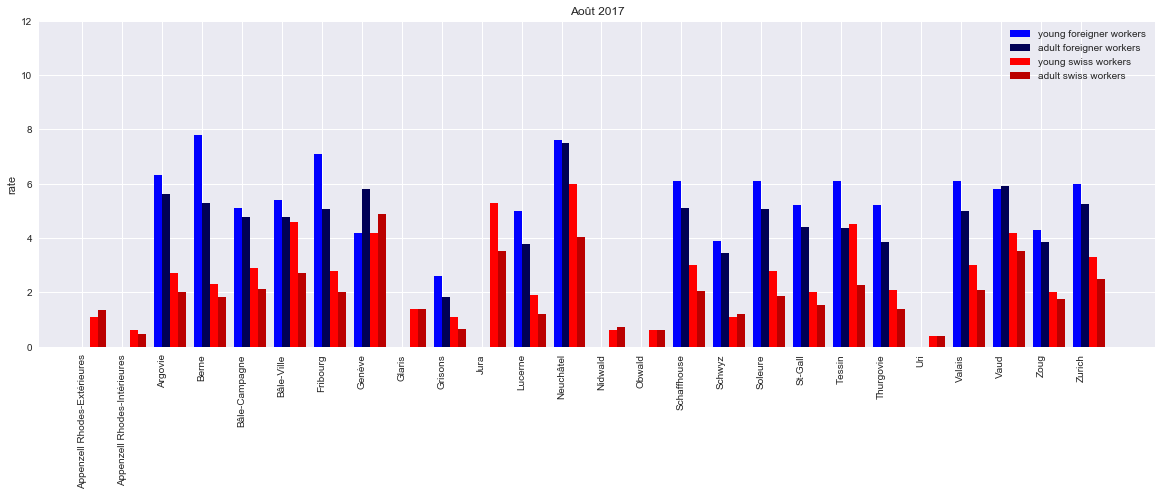

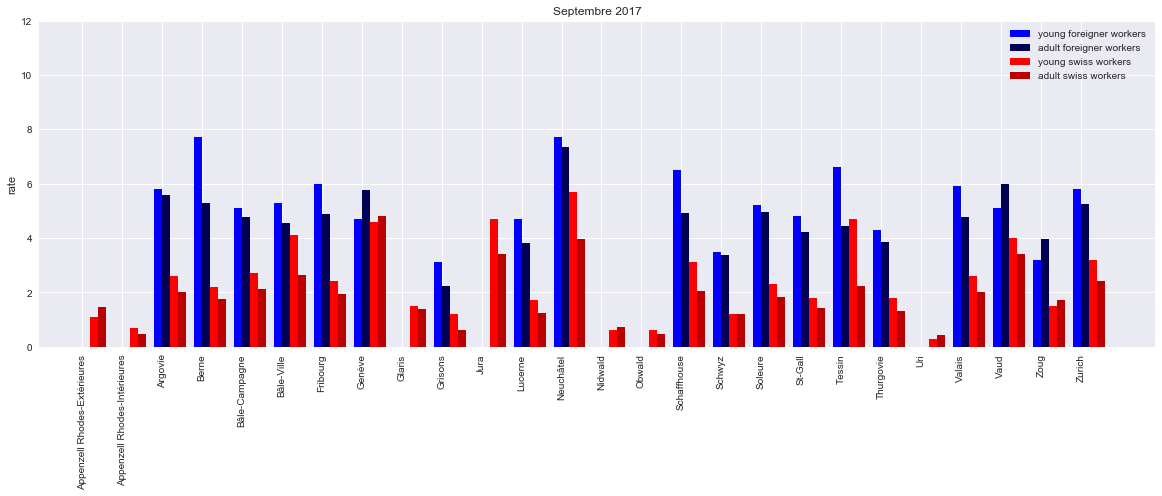

In [89]:
# first solution for the bar plots
for month,data in df_final.iterrows():
    # number of cantons
    N = 26
    
    # empty lists
    un_young_foreigner = []
    un_adult_foreigner = []
    un_young_swiss = []
    un_adult_swiss = []
    labels = []
    
    #dimensions
    ind = np.arange(0,10*N,10)
    width = 2
    
    fig, ax = plt.subplots()
    
    # fill the lists with the value we want
    for title,table in data.groupby(level=[0]):
        un_young_foreigner.append(table[0])
        un_adult_foreigner.append(table[1])
        un_young_swiss.append(table[3])
        un_adult_swiss.append(table[4])
        labels.append(title)
    
    # defining the bars
    rects1 = ax.bar(ind, un_young_foreigner, width, color='#0000ff')
    rects2 = ax.bar(ind+width, un_adult_foreigner, width, color='#000055')
    rects3 = ax.bar(ind+2*width, un_young_swiss, width, color='#ff0000')
    rects4 = ax.bar(ind+3*width, un_adult_swiss, width, color='#bb0000')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('rate')
    ax.set_title(month)
    ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),
              ('young foreigner workers', 'adult foreigner workers', 'young swiss workers', 'adult swiss workers'))
    ax.set_ylim(0,12)
    plt.xticks(ind + width / 2, labels, rotation='vertical')
    
    # show
    plt.show()

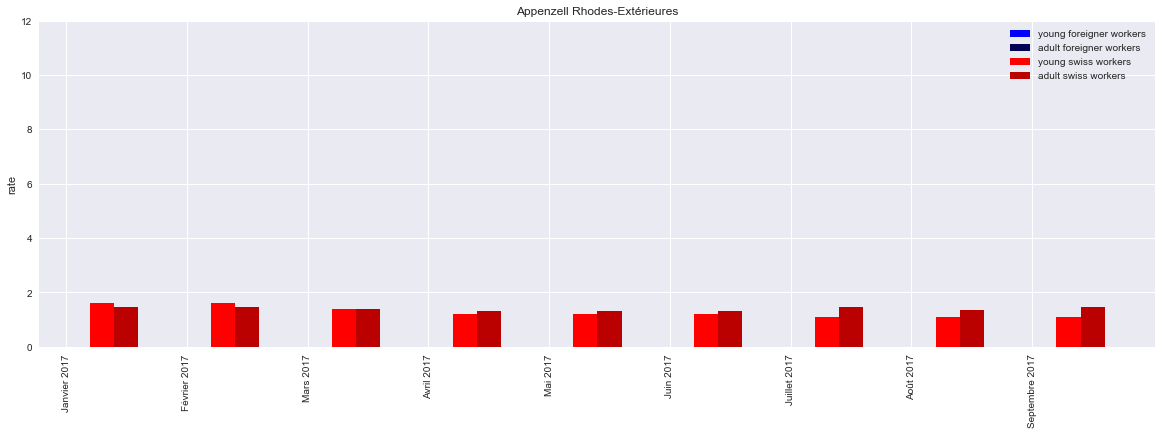

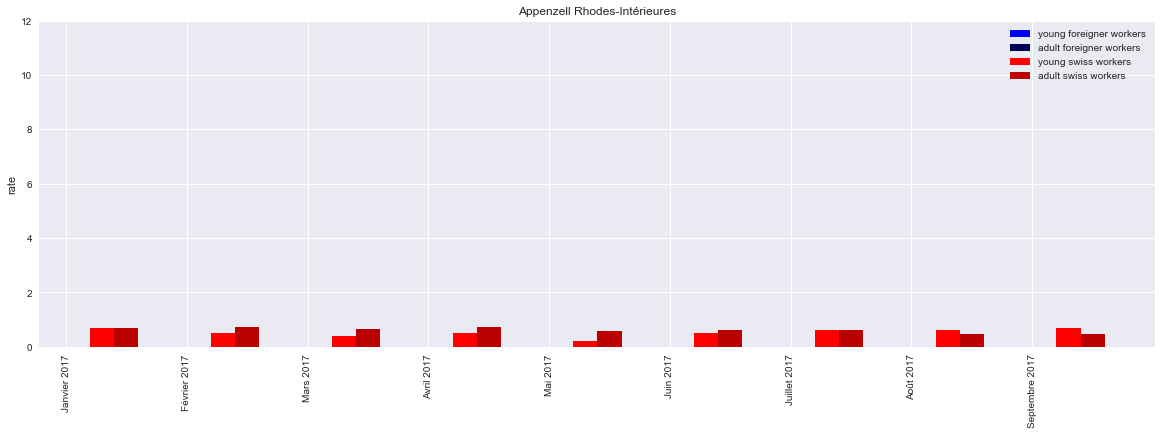

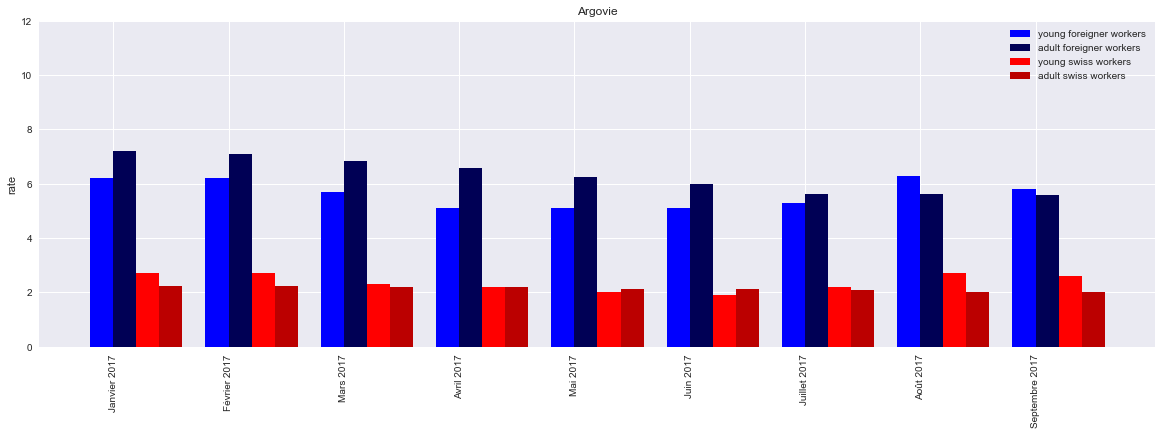

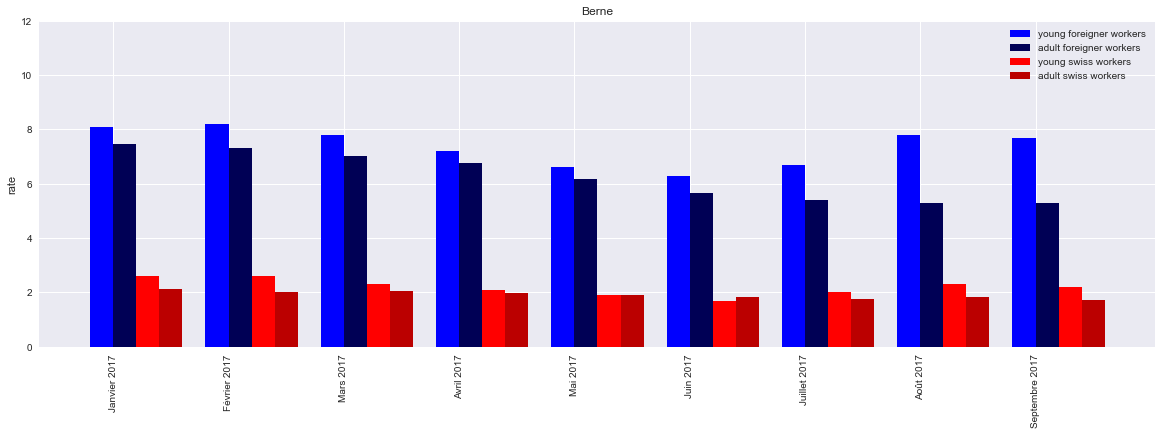

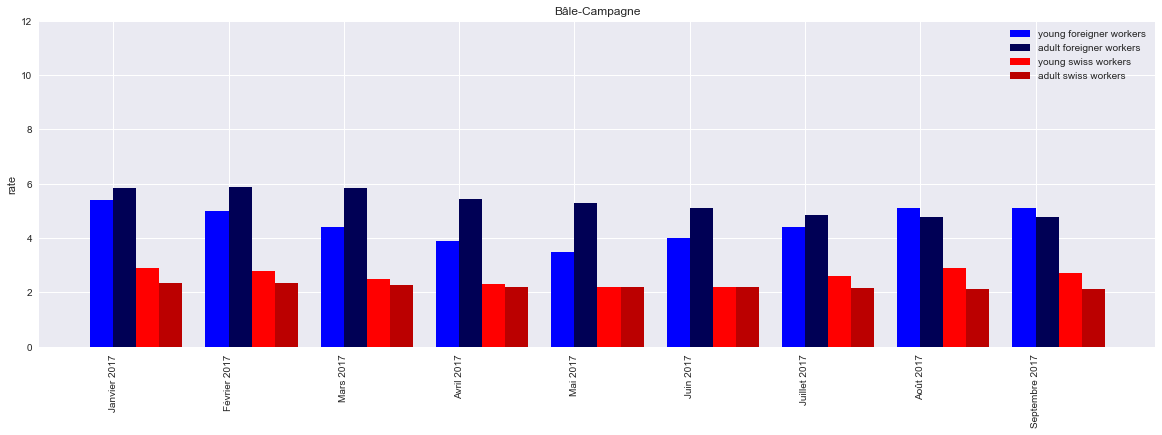

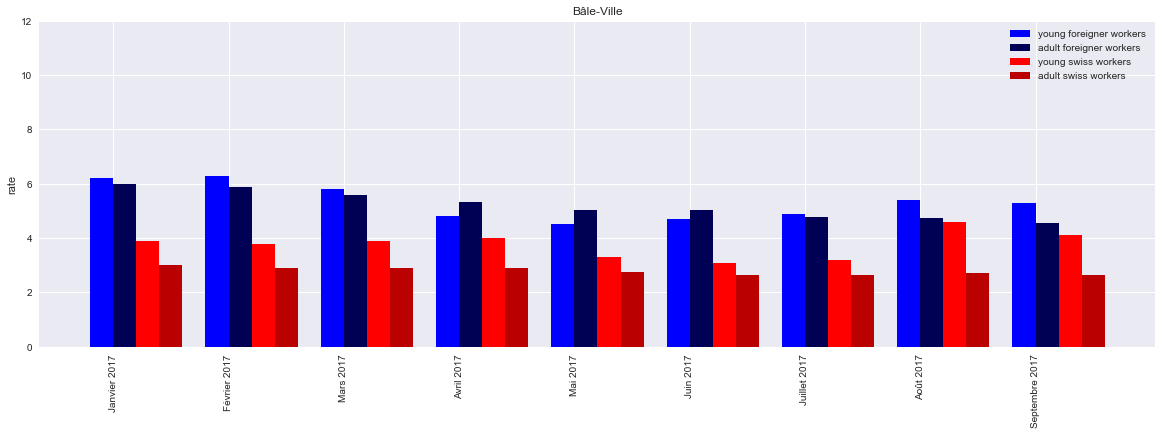

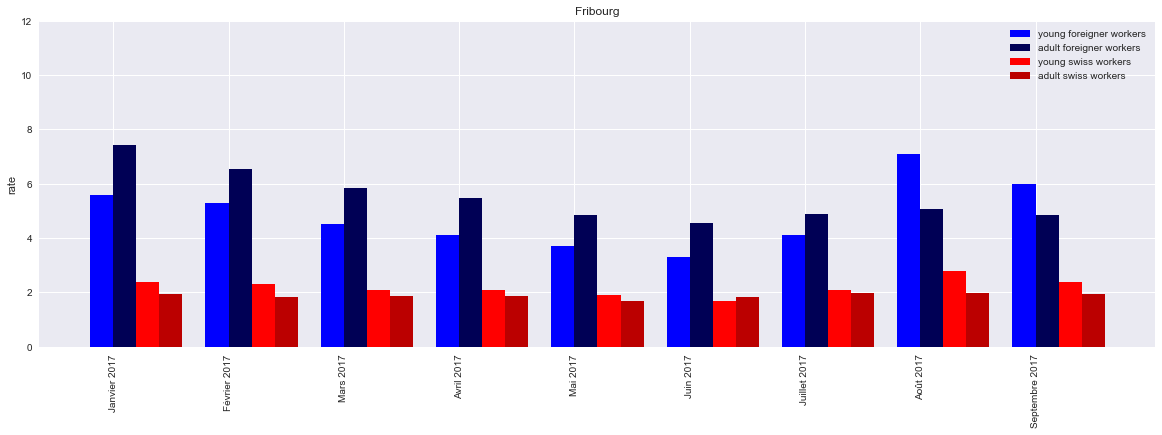

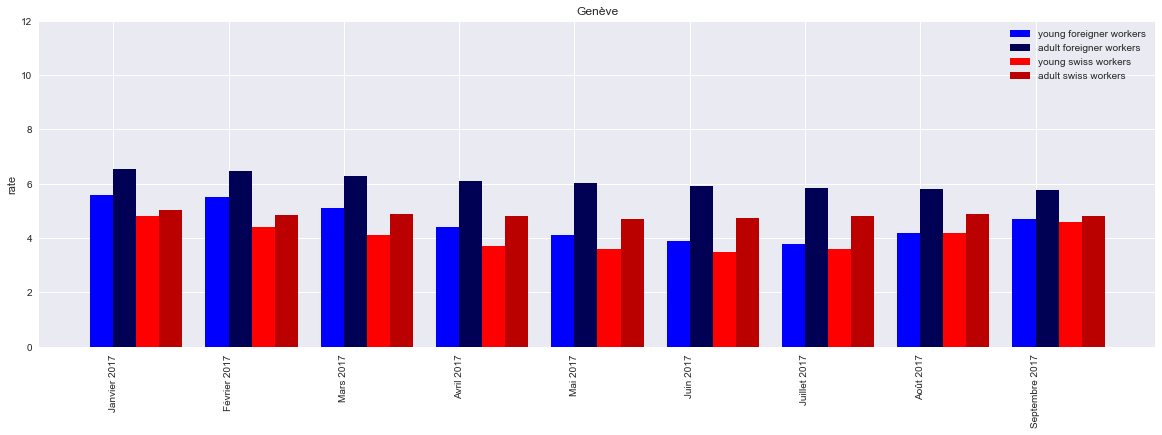

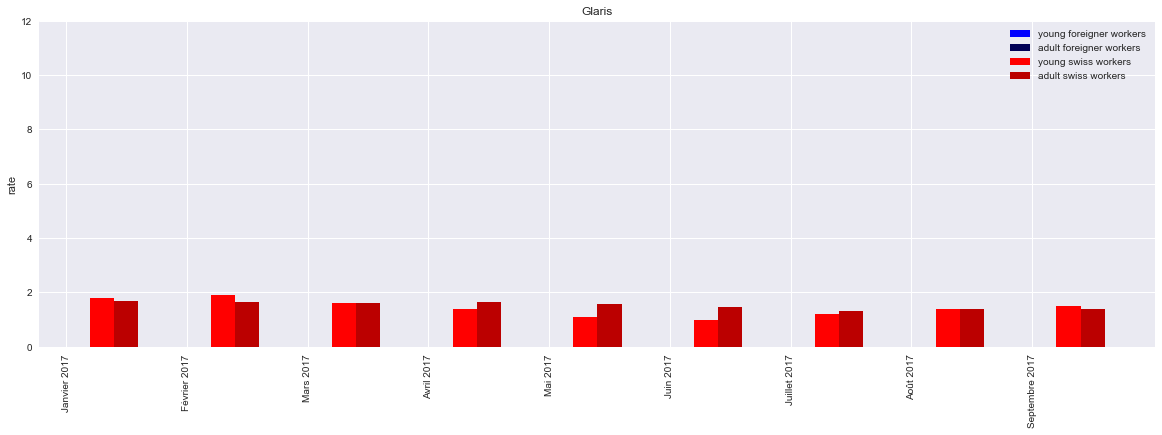

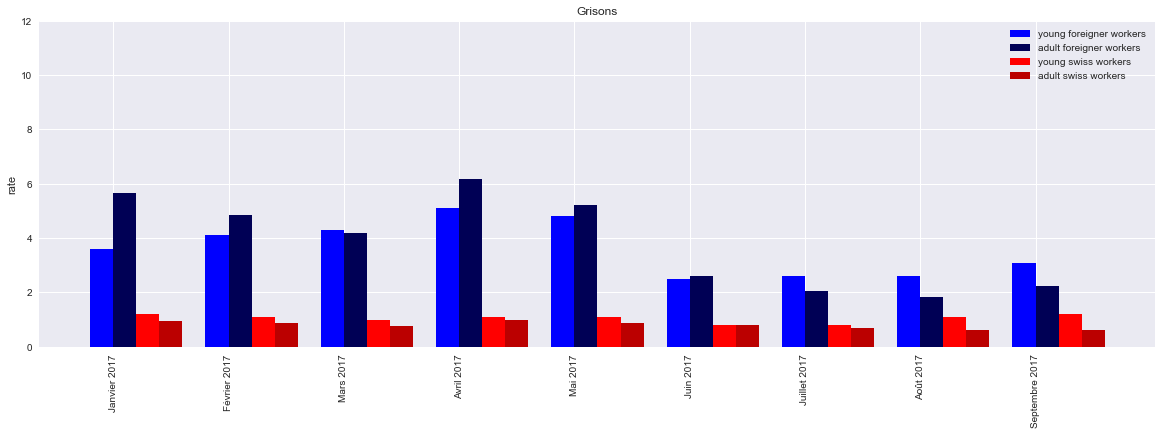

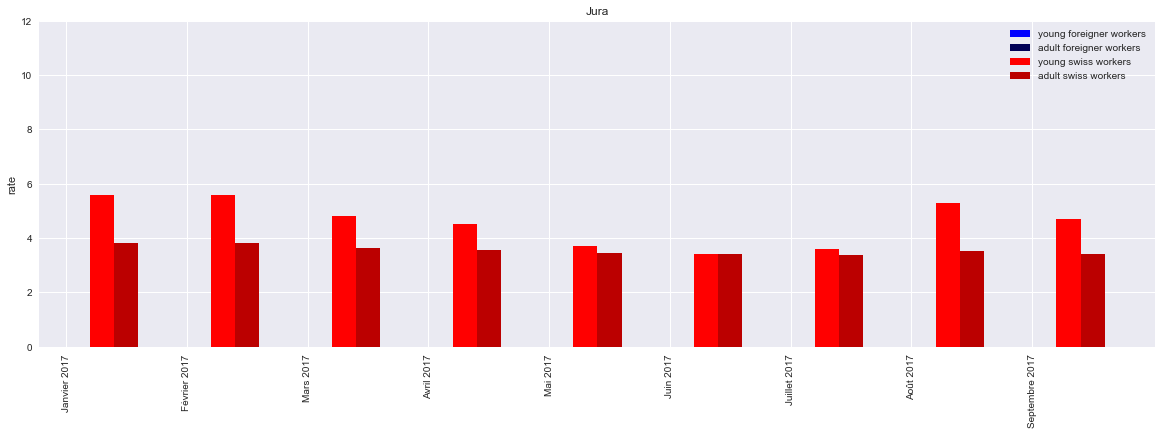

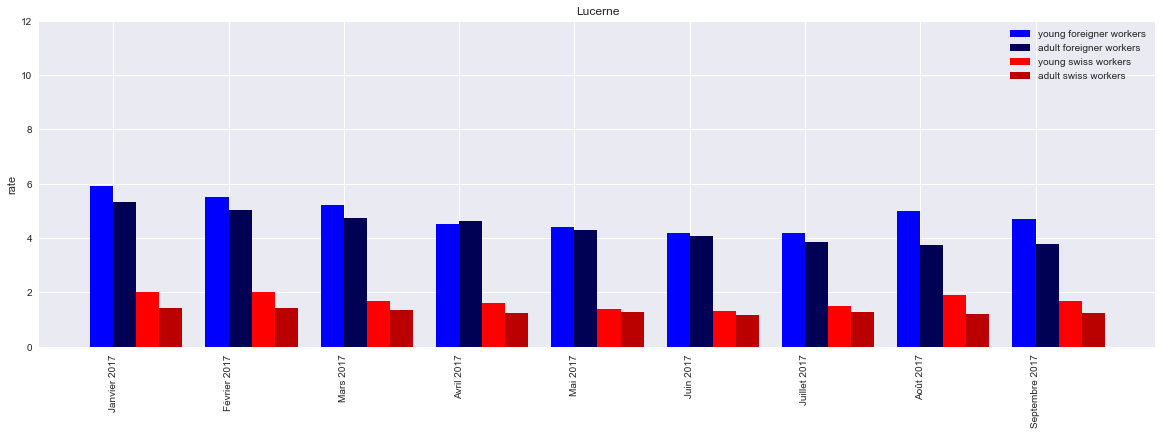

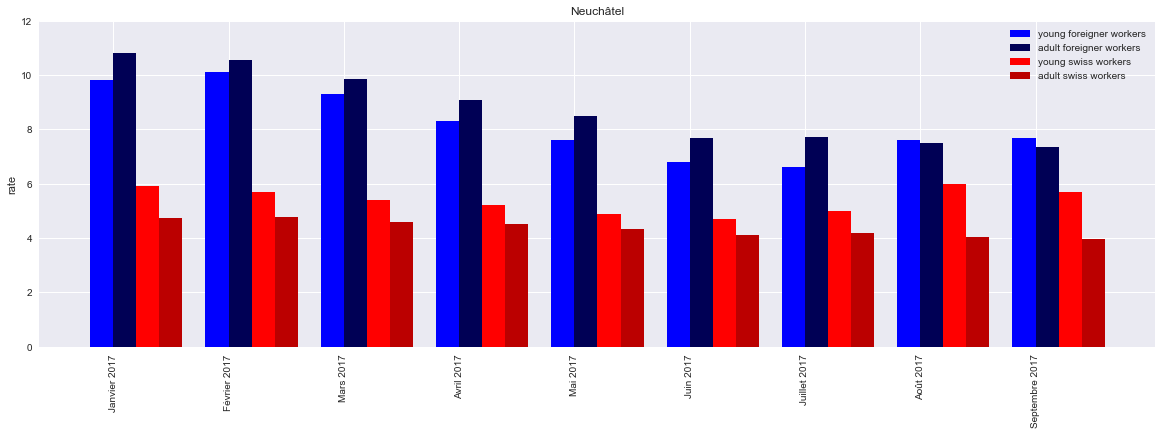

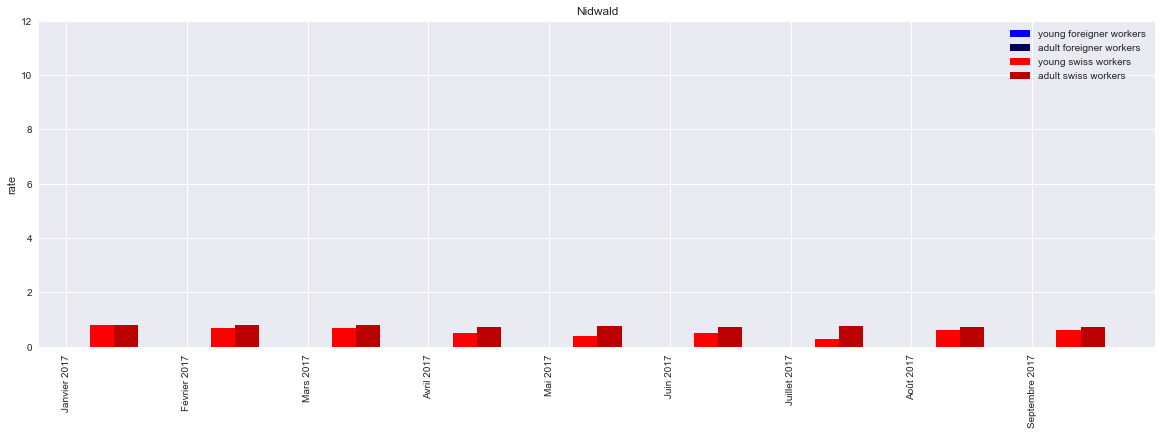

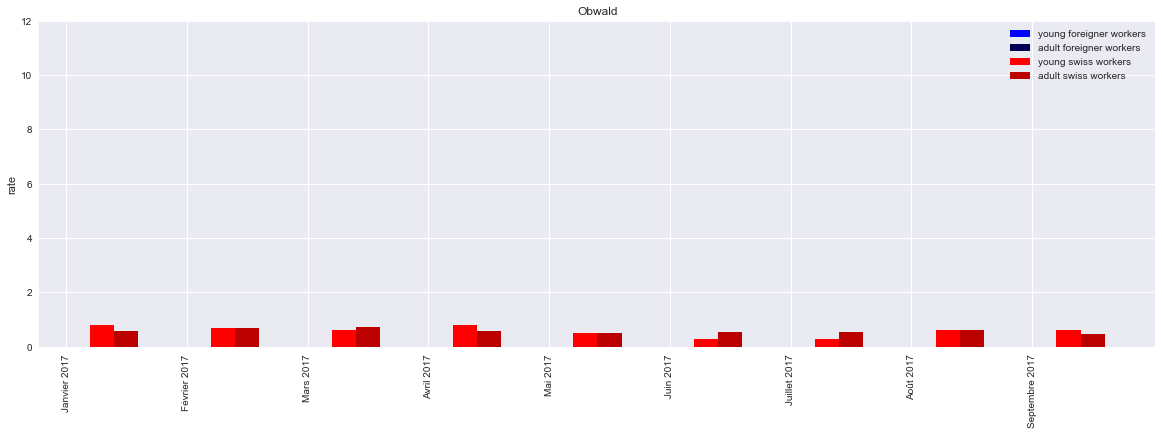

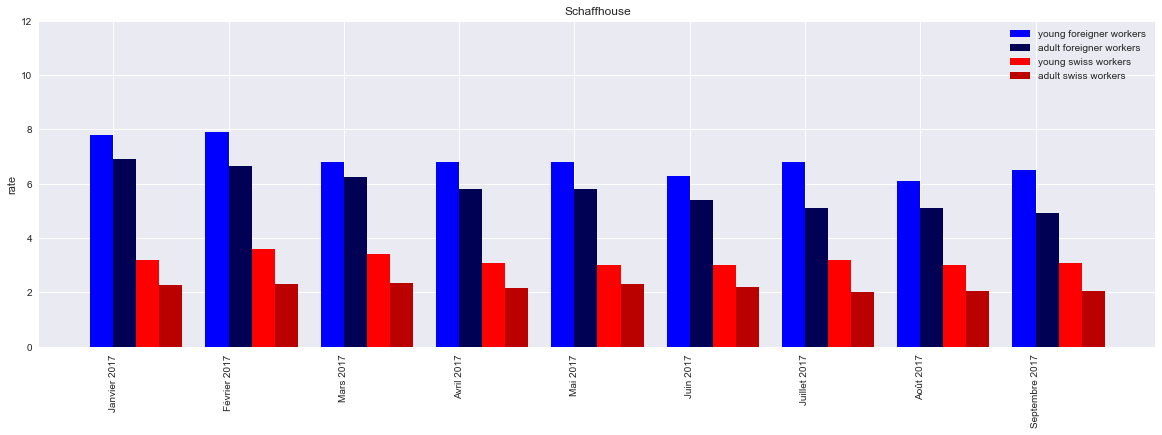

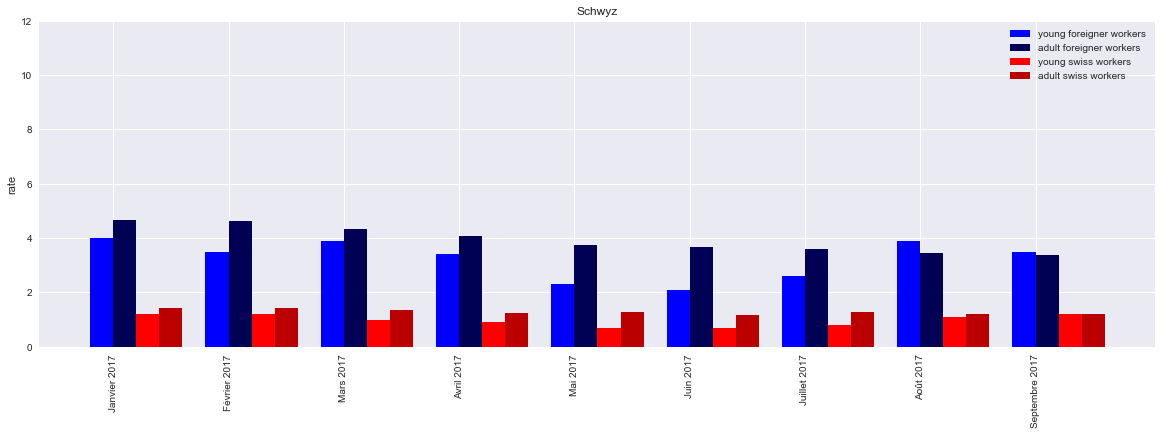

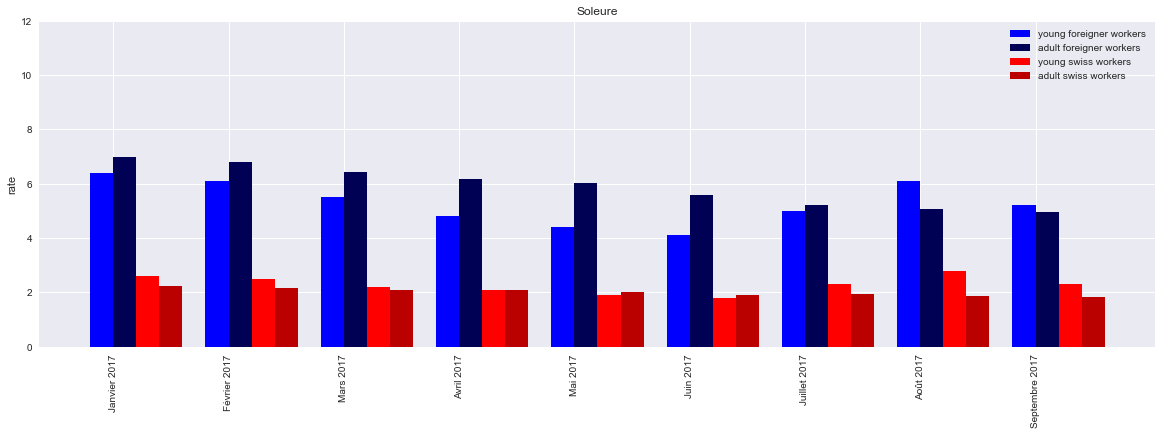

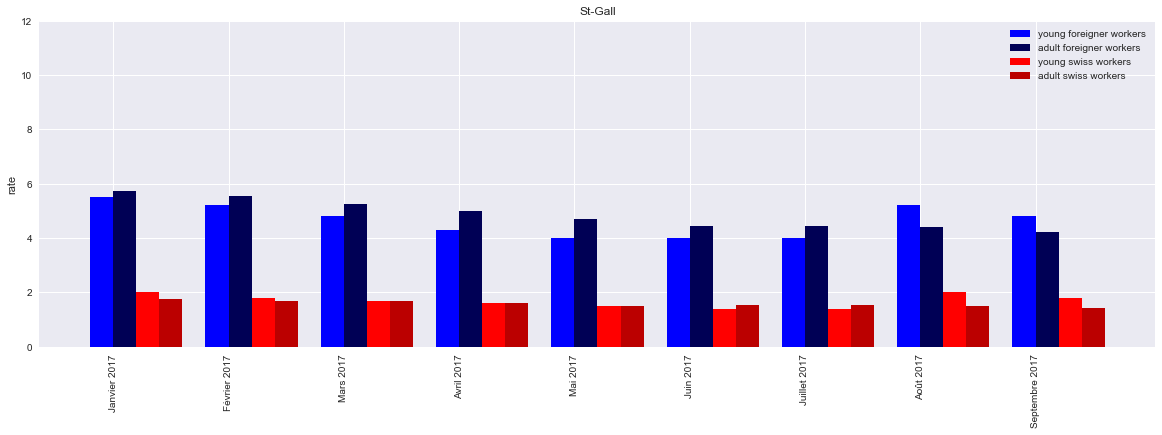

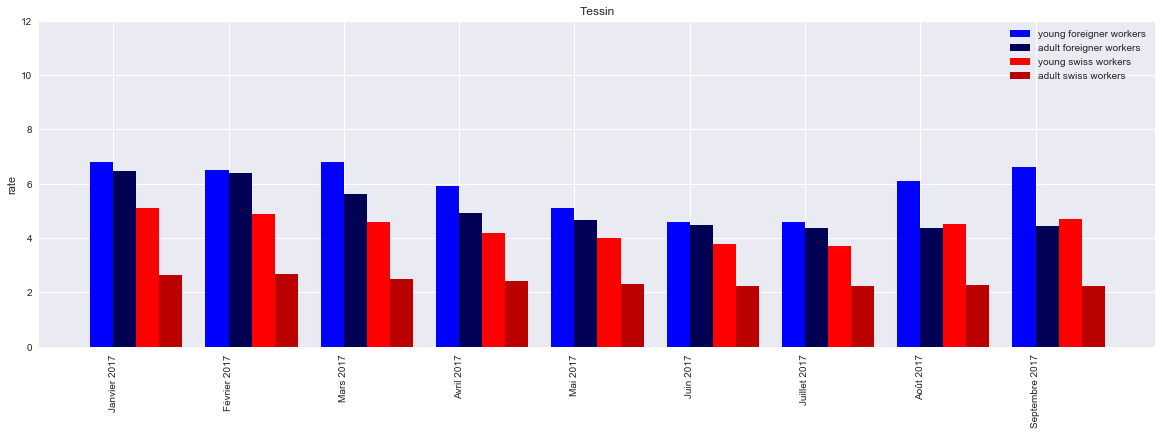

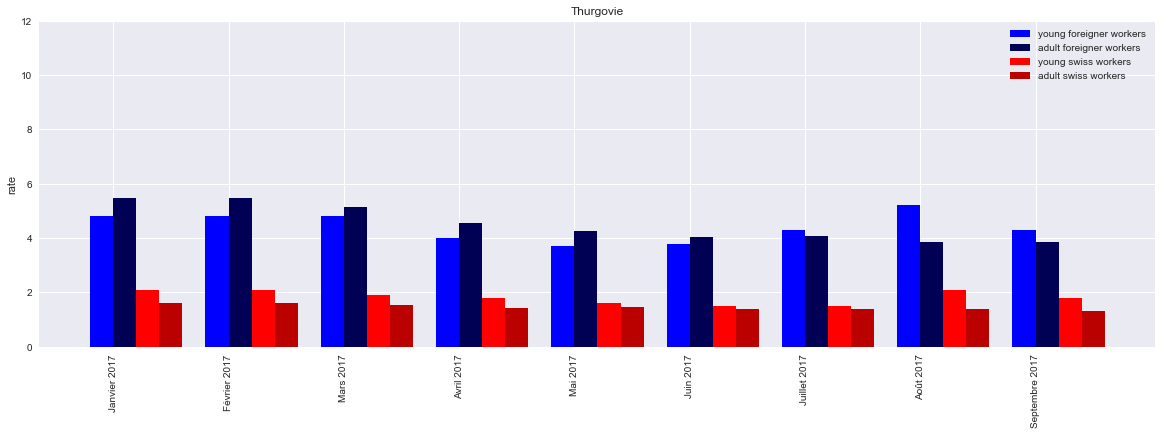

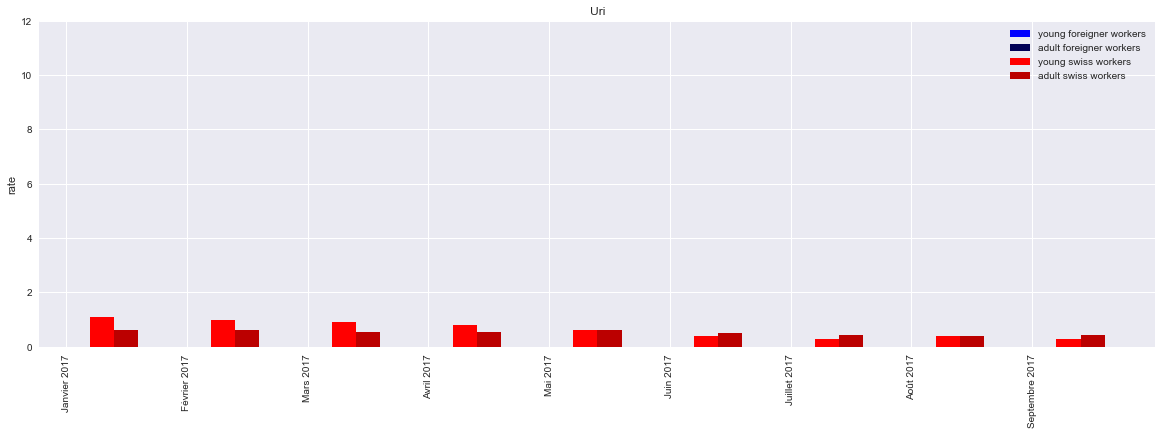

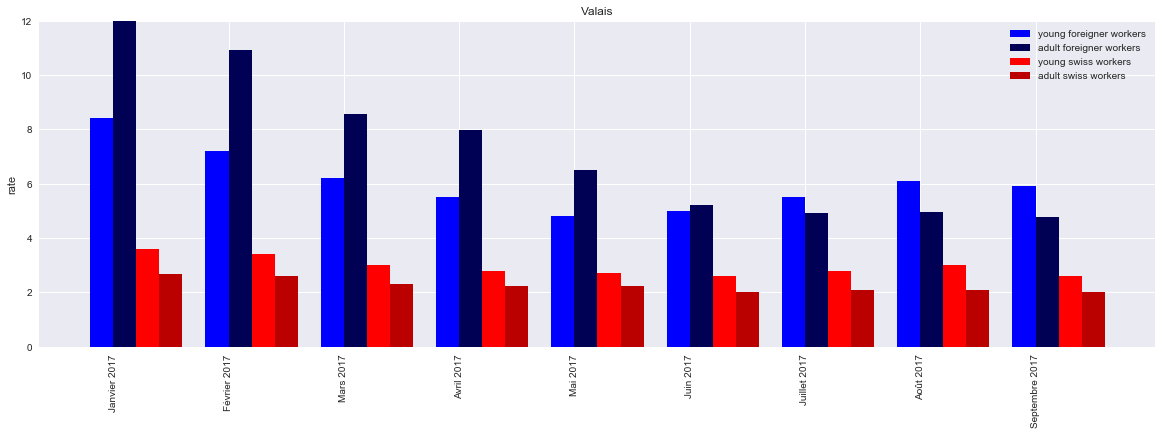

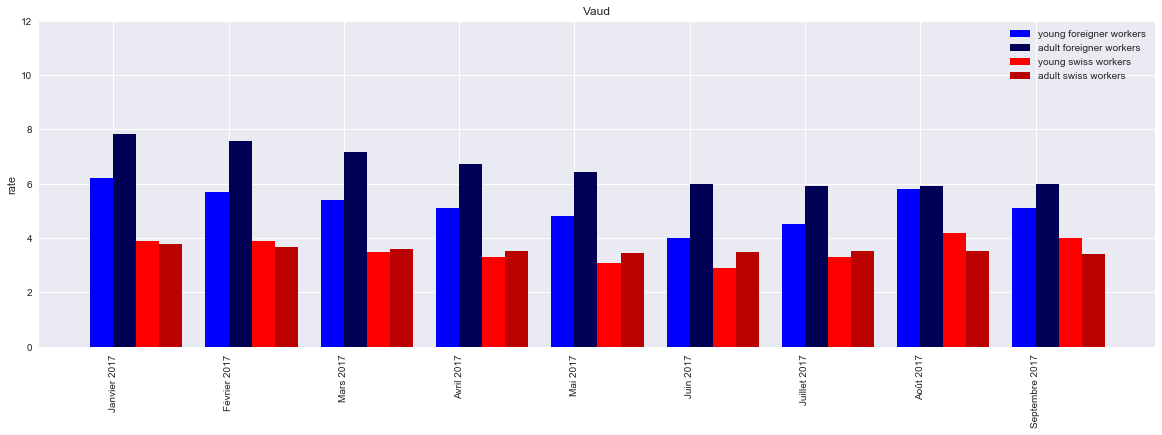

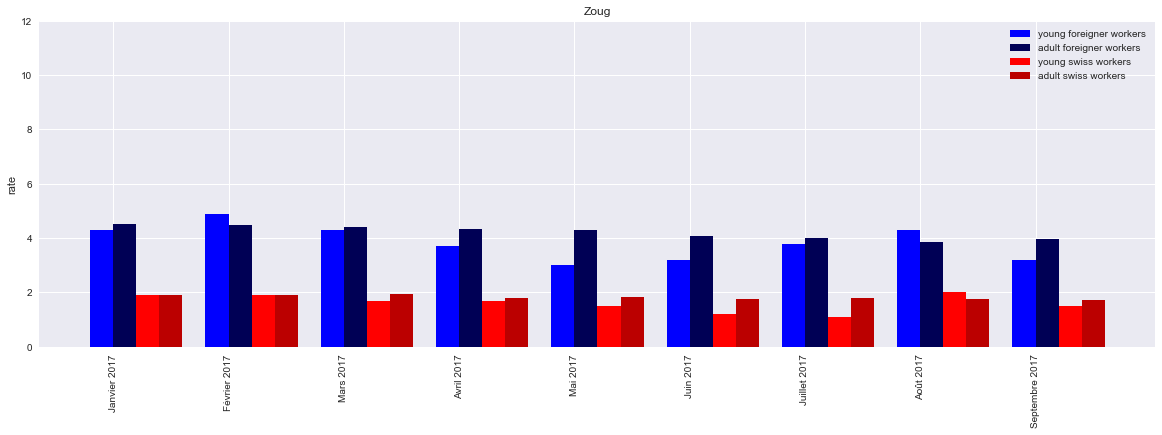

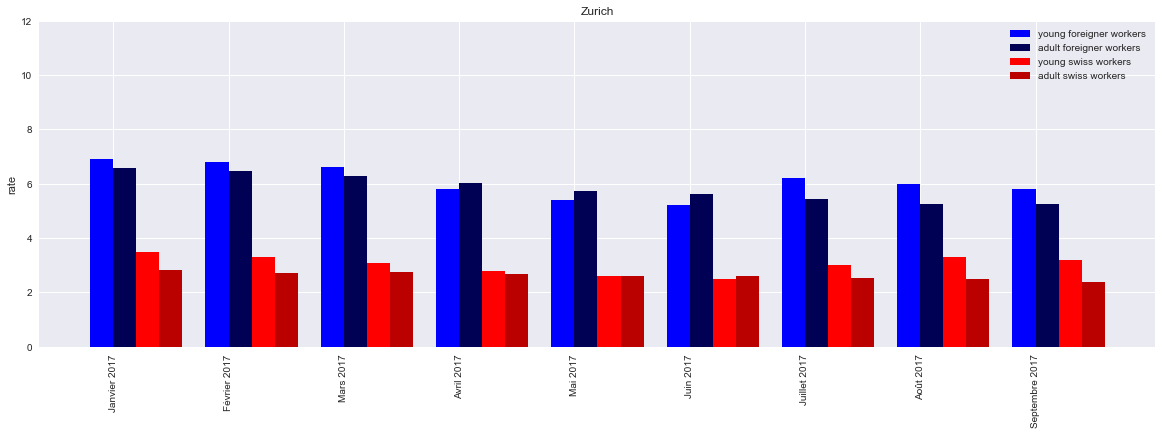

In [90]:
# first solution for the bar plots
for title,table in df_final.groupby(level=[0], axis=1):
    # number of months
    N = 9
    
    # empty lists
    un_young_foreigner = []
    un_adult_foreigner = []
    un_young_swiss = []
    un_adult_swiss = []
    labels = []
    
    #dimensions
    ind = np.arange(0,10*N,10) 
    width = 2       
    
    fig, ax = plt.subplots()
    
    #fill the lists
    for month,data in table.iterrows():
        un_young_foreigner.append(data[0])
        un_adult_foreigner.append(data[1])
        un_young_swiss.append(data[3])
        un_adult_swiss.append(data[4])
        labels.append(month)
        
    # define the bars
    rects1 = ax.bar(ind, un_young_foreigner, width, color='#0000ff')
    rects2 = ax.bar(ind+width, un_adult_foreigner, width, color='#000055')
    rects3 = ax.bar(ind+2*width, un_young_swiss, width, color='#ff0000')
    rects4 = ax.bar(ind+3*width, un_adult_swiss, width, color='#bb0000')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('rate')
    ax.set_title(title)
    ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]),
              ('young foreigner workers', 'adult foreigner workers', 'young swiss workers', 'adult swiss workers'))
    ax.set_ylim(0,12)
    plt.xticks(ind + width / 2, labels, rotation='vertical')
    
    plt.show()

# Task 4: Bonus part

As we could not find any json for Rostigraben, we had two solutions: make one ourself or use some tricks with the existing data and information about Rostigraben. We opted for the latter.

We choose to ignore Romansch part as there is no Romansch canton.

canton  GR  was ignored.
canton  VS  was ignored.


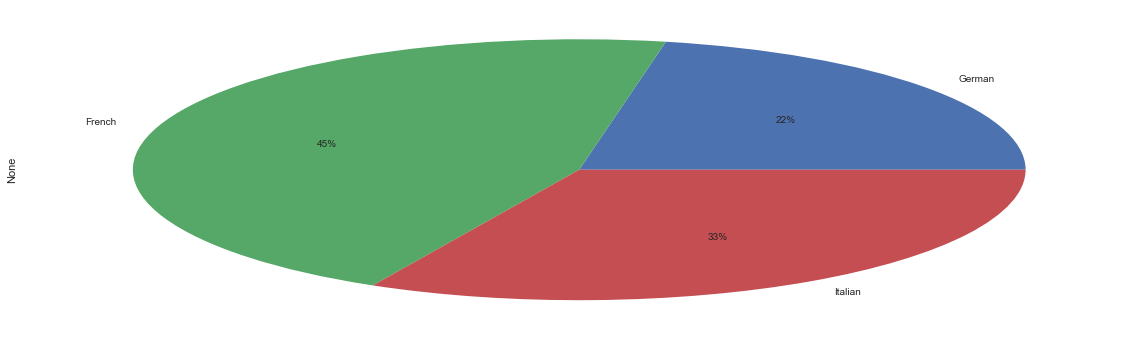

In [95]:
import matplotlib.pyplot as plt


German_side=[] # added below
French_Side=['GE','VD','FR','NE','JU']
Italian_Side=['TI']
for canton in DF_plot['ID'].values:
    if not((canton in Italian_Side) or (canton in French_Side)):
        German_side.append(canton)

# We remove the two cantons that are shared between different Rosti sides
German_side.remove('VS')
German_side.remove('GR')
RostiSides=['German','French','Italian']

total= [0,0,0] 

DF_plot['average'] = DF_plot.mean(axis=1)

for canton in DF_plot['ID'].values:
    if(canton in German_side):
        total[0] += DF_plot.loc[DF_plot['ID']==canton,'average'].values[0]
    elif(canton in French_Side):
        total[1] += DF_plot.loc[DF_plot['ID']==canton,'average'].values[0]
    elif(canton in Italian_Side):
        total[2] += DF_plot.loc[DF_plot['ID']==canton,'average'].values[0]
    else:
        print('canton ', canton, ' was ignored.')
total_normalized = [total[0]/len(German_side), total[1]/len(French_Side), total[2]/len(Italian_Side) ]
pd.Series(total_normalized,index=RostiSides).plot.pie(autopct='%1.0f%%')
plt.show()

We can observe that, on average and with the hypotheses we have made, the German side has the lowest  unemployment rates (2.27%), followed by italian part (3.35%) and the french side (4.61)%.